In [3]:
# jupyter setup boilerplate
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


from fitting import *
from malab import SlabFile, get_next_filename

import json
import datetime

from qualang_tools.plot import Fit

import pprint as pp

from plotting_helpers import *

import qick_tprocv2_experiments.q1_q2_avoided_crossing_flux_values
from qick_tprocv2_experiments.q1_q2_avoided_crossing_flux_values import freqs_q1, freqs_q2, corrected_dac_values

flux_array = corrected_dac_values # in unit of mA
flux_array = [arr.tolist() for arr in flux_array]

No module named 'visa'
Warning VISA library import failed
Warning serial library import failed.
Could not load InstrumentManagerWindow
2025-04-15 13:54:51,577 - qm - INFO     - Starting session: c3e6d28e-4df9-4bce-8f46-3d17f846d0dc


In [151]:
global_data_path = r"M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250414 - Santi - RFSoC tprocv2 - char4100MHz"
expt_path = r"\q2q3 - avoided_crossing"
global_data_path = global_data_path + expt_path

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

## Avoided Crossing

In [ ]:
TRM = array([[ 1.        , -0.11397061, -0.2587036 , -0.28050569, -0.1660616 ,
        -0.07645482, -0.04368518, -0.00588488],
       [ 0.26125137,  1.        , -0.19756347, -0.33937325, -0.27853692,
        -0.19010634, -0.10639071, -0.016038  ],
       [ 0.22152972,  0.12658328,  1.        , -0.31431047, -0.32633708,
        -0.21942528, -0.14925022, -0.07477466],
       [ 0.21795905,  0.1241314 ,  0.04563477,  1.        , -0.35426775,
        -0.27208706, -0.2074165 , -0.11710245],
       [ 0.24686491,  0.14959481,  0.05232058, -0.06130094,  1.        ,
        -0.36099434, -0.28661645, -0.20891156],
       [ 0.24005248,  0.15270144,  0.06368831, -0.0476997 , -0.13006732,
         1.        , -0.3216176 , -0.26848839],
       [ 0.25187251,  0.163719  ,  0.07630371, -0.02882929, -0.0996814 ,
        -0.17286113,  1.        , -0.37943531],
       [ 0.36707417,  0.2408253 ,  0.11562919, -0.01516484, -0.07545473,
        -0.15037879, -0.23617742,  1.        ]])

# generate flux values for all of the qubits (sweep qubit 1 frequency)
corrected_dac_values = []
ctrl_flux = np.linspace(-0.3, 0.3, 60) # in unit of mA
const_val = 0.9
ctrl_flux += const_val
for val in ctrl_flux:
    # pt = [dc coil, f0, f1, f2, f3, f4, f5, f6, f7]
    pt_target = [1.6, val, 0.3, 0, 0, 0, 0, 0, 0]
    # pt_target[qubitInd+1] = target
    # print('flux target =', pt_target)
    pt = np.dot(TRM,pt_target[1:])
    pt = np.insert(pt, 0, pt_target[0])
    # print('With crosstalk correction!')
    # print('flux actual =', pt)
    # print('\n\n')
    corrected_dac_values.append(pt)

flux_array = corrected_dac_values # in unit of mA
flux_array = [arr.tolist() for arr in flux_array]
num = 60
flux_array = np.array(flux_array)[:num]

In [143]:
flux_array = np.linspace(-0.3, 0.3, 60) # in unit of mA
print(len(flux_array))
print(flux_array)

60
[-0.3        -0.28983051 -0.27966102 -0.26949153 -0.25932203 -0.24915254
 -0.23898305 -0.22881356 -0.21864407 -0.20847458 -0.19830508 -0.18813559
 -0.1779661  -0.16779661 -0.15762712 -0.14745763 -0.13728814 -0.12711864
 -0.11694915 -0.10677966 -0.09661017 -0.08644068 -0.07627119 -0.06610169
 -0.0559322  -0.04576271 -0.03559322 -0.02542373 -0.01525424 -0.00508475
  0.00508475  0.01525424  0.02542373  0.03559322  0.04576271  0.0559322
  0.06610169  0.07627119  0.08644068  0.09661017  0.10677966  0.11694915
  0.12711864  0.13728814  0.14745763  0.15762712  0.16779661  0.1779661
  0.18813559  0.19830508  0.20847458  0.21864407  0.22881356  0.23898305
  0.24915254  0.25932203  0.26949153  0.27966102  0.28983051  0.3       ]


In [142]:
flux_array = ctrl_flux
print(len(flux_array))
print(flux_array)

60
[1.8        1.81016949 1.82033898 1.83050847 1.84067797 1.85084746
 1.86101695 1.87118644 1.88135593 1.89152542 1.90169492 1.91186441
 1.9220339  1.93220339 1.94237288 1.95254237 1.96271186 1.97288136
 1.98305085 1.99322034 2.00338983 2.01355932 2.02372881 2.03389831
 2.0440678  2.05423729 2.06440678 2.07457627 2.08474576 2.09491525
 2.10508475 2.11525424 2.12542373 2.13559322 2.14576271 2.1559322
 2.16610169 2.17627119 2.18644068 2.19661017 2.20677966 2.21694915
 2.22711864 2.23728814 2.24745763 2.25762712 2.26779661 2.2779661
 2.28813559 2.29830508 2.30847458 2.31864407 2.32881356 2.33898305
 2.34915254 2.35932203 2.36949153 2.37966102 2.38983051 2.4       ]


### Resonator Spectroscopy

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


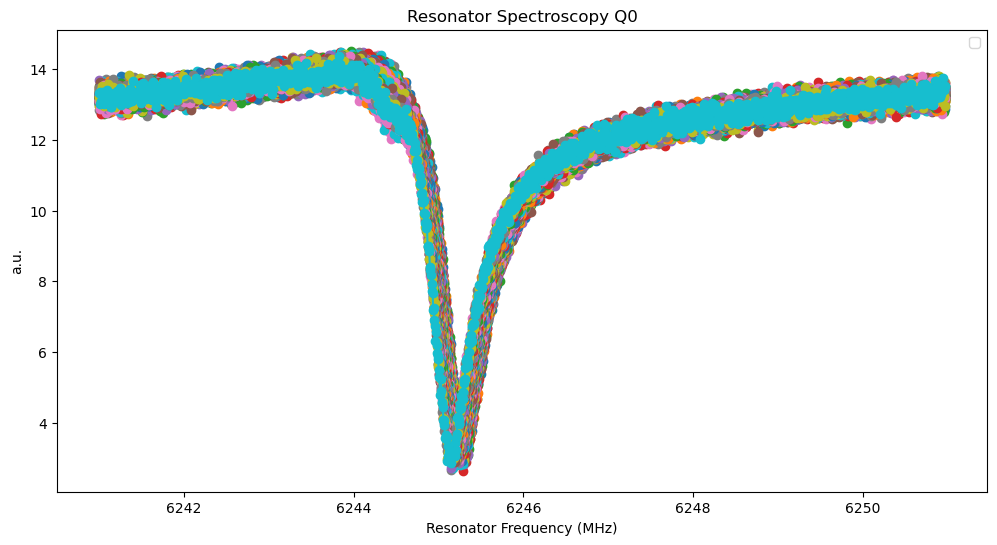

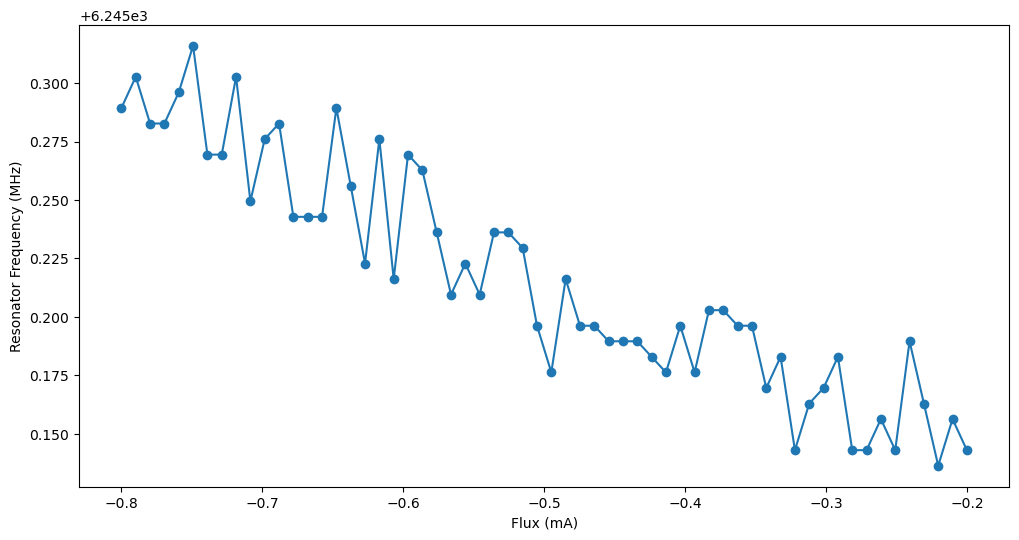

res_freq_0 = [6245.289363098144, 6245.30266342163, 6245.282712936401, 6245.282712936401, 6245.296013259887, 6245.315963745117, 6245.2694126129145, 6245.2694126129145, 6245.30266342163, 6245.249462127686, 6245.276062774658, 6245.282712936401, 6245.242811965943, 6245.242811965943, 6245.242811965943, 6245.289363098144, 6245.2561122894285, 6245.222861480713, 6245.276062774658, 6245.21621131897, 6245.2694126129145, 6245.2627624511715, 6245.236161804199, 6245.209561157227, 6245.222861480713, 6245.209561157227, 6245.236161804199, 6245.236161804199, 6245.229511642456, 6245.19626083374, 6245.176310348511, 6245.21621131897, 6245.19626083374, 6245.19626083374, 6245.189610671997, 6245.189610671997, 6245.189610671997, 6245.182960510254, 6245.176310348511, 6245.19626083374, 6245.176310348511, 6245.202910995483, 6245.202910995483, 6245.19626083374, 6245.19626083374, 6245.169660186767, 6245.182960510254, 6245.143059539795, 6245.163010025024, 6245.169660186767, 6245.182960510254, 6245.143059539795, 624

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


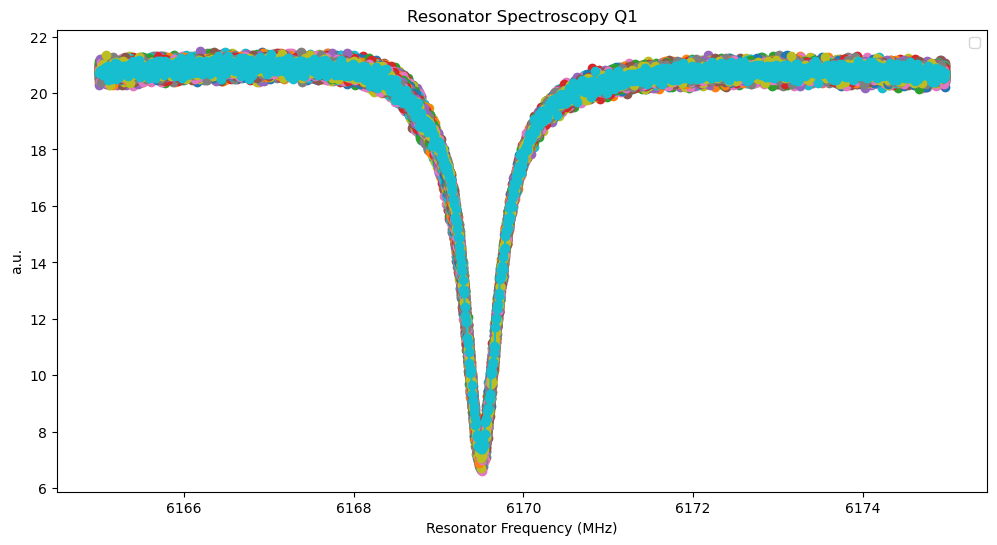

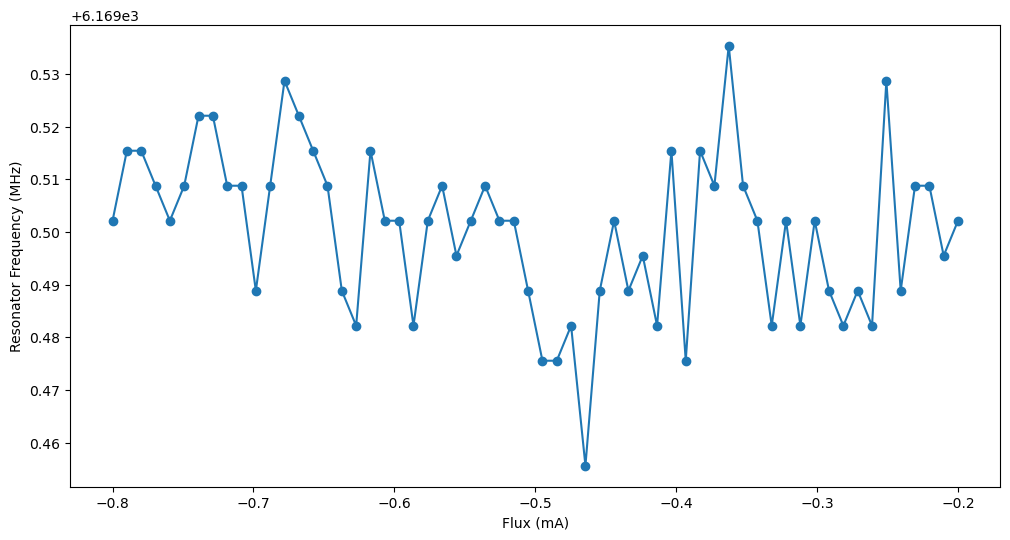

res_freq_1 = [6169.502156066894, 6169.515456390381, 6169.515456390381, 6169.508806228638, 6169.502156066894, 6169.508806228638, 6169.522106552124, 6169.522106552124, 6169.508806228638, 6169.508806228638, 6169.488855743408, 6169.508806228638, 6169.528756713867, 6169.522106552124, 6169.515456390381, 6169.508806228638, 6169.488855743408, 6169.482205581665, 6169.515456390381, 6169.502156066894, 6169.502156066894, 6169.482205581665, 6169.502156066894, 6169.508806228638, 6169.495505905151, 6169.502156066894, 6169.508806228638, 6169.502156066894, 6169.502156066894, 6169.488855743408, 6169.475555419922, 6169.475555419922, 6169.482205581665, 6169.455604934692, 6169.488855743408, 6169.502156066894, 6169.488855743408, 6169.495505905151, 6169.482205581665, 6169.515456390381, 6169.475555419922, 6169.515456390381, 6169.508806228638, 6169.53540687561, 6169.508806228638, 6169.502156066894, 6169.482205581665, 6169.502156066894, 6169.482205581665, 6169.502156066894, 6169.488855743408, 6169.482205581665,

In [34]:
data_path = global_data_path + "\\"
for q in range(2):
    data_files = []
    for i in range(num):
        try:
            temp_file = data_path + str(f"{i:05d}") + '_res_spec_ge_Q' + str(q) + '_2025-04-14.h5'
            with SlabFile(temp_file, 'r') as f:
                data_files.append(temp_file)
        except:
            if q == 0:
                i-=9
            elif q == 1:
                i-=8
            temp_file = data_path + str(f"{i:05d}") + '_res_spec_ge_Q' + str(q) + '_2025-04-15.h5'
            # print(temp_file)
            data_files.append(temp_file)
    
    res_freq = []

    plt.figure(figsize=(12,6))
    for i, data in enumerate(data_files):
        with SlabFile(data, 'r') as f:
            freqs = array(f['fpts'])[0]
            amps = array(f['amps'])[0]
            # fit_result = f.attrs['fit_result']
            # fit_result = json.loads(fit_result)
            config = f.attrs['config']
            config = json.loads(config)

        # pp.pprint(config)

        # print('\n data path:', data)
        # plt.figure(figsize=(12,6))
        plt.plot(freqs, amps, marker='o')
        # plt.plot(freqs, y_fit, marker='', label = 'Fitted data')
        plt.ylabel("a.u.")
        plt.xlabel("Resonator Frequency (MHz)")
        plt.title('Resonator Spectroscopy Q' + str(q))

        res_freq.append(freqs[np.argmin(amps)])
        # fit = Fit()
        # fit_results = fit.reflection_resonator_spectroscopy(freqs, amps, plot=True)
        # plt.axvline(fit_results['f'][0], marker='', c='red', linestyle='--')
        # plt.axvline(freqs[np.argmin(amps)], marker='', c='blue', linestyle='--', label='min amp: ' + str(freqs[np.argmin(amps)]))
        # print('min amp at ', str(freqs[np.argmin(amps)]), 'MHz')
        # pp.pprint(fit_results)
    plt.legend()
    plt.show()

    plt.figure(figsize=(12,6))
    plt.plot(np.array(flux_array).T, res_freq, marker='o')
    # plt.xlabel('Qubit Frequency (GHz)')
    plt.xlabel('Flux (mA)')
    plt.ylabel('Resonator Frequency (MHz)')
    # plt.title('Resonator Frequency vs Qubit Frequency')
    plt.show()
    print('res_freq_' + str(q) + ' =', res_freq)


### Qubit Spectroscopy

In [152]:
q1_flux = flux_array[:num]

data_path = global_data_path + "\\"
data_files0 = []
data_files1 = []
q1 = 2
q2 = 3
date1 = '2025-04-15'
date2 = '2025-04-15'
index_shift = 0
for i in range(len(q1_flux)):
    try:
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(q1) + '_' + date1 + '.h5'
        with SlabFile(temp_file, 'r') as f:
            data_files0.append(temp_file)
    except:
        i-=index_shift
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(q1) + '_' + date2 + '.h5'
        # print(temp_file)
        data_files0.append(temp_file)

# data_path = r"M:/malab/_Data/20250130 - Santi - RFSoC tprocv2 - LL8qubit J meas Q1 Q2/data/third_iteration/"
data_files1 = []
for i in range(len(q1_flux)):
    try:
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(q2) + '_' + date1 + '.h5'
        with SlabFile(temp_file, 'r') as f:
            data_files1.append(temp_file)
    except:
        i-=index_shift
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(q2) + '_' + date2 + '.h5'
        # print(temp_file)
        data_files1.append(temp_file)


#### Plotting fitted values for each qubit

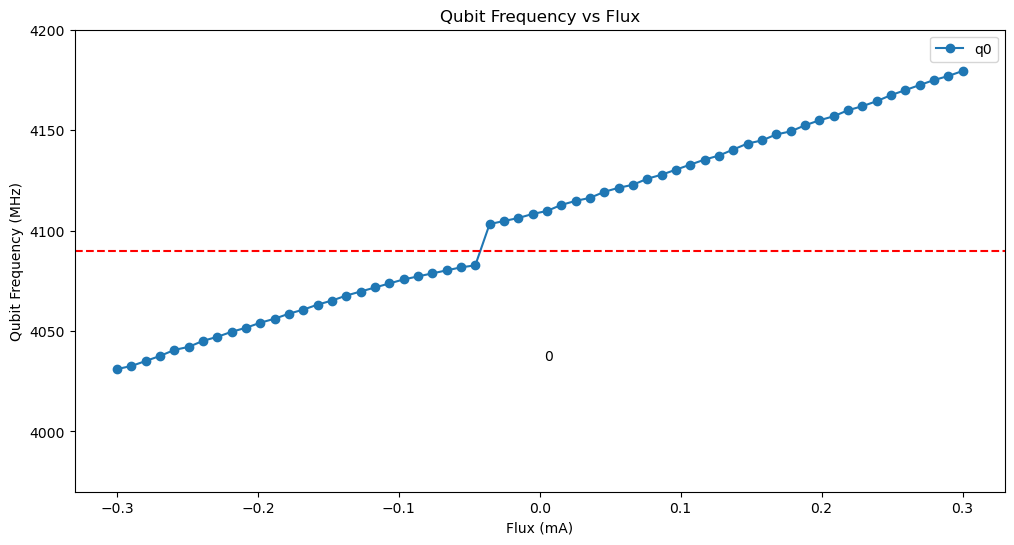

In [233]:
q1_flux = np.array(flux_array)

qubit0_freqs = []

for i, data in enumerate(data_files0):
    with SlabFile(data, 'r') as f:
        freqs = array(f['fpts'])[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)

    # qubit0_freqs.append(freqs[np.argmax(amps)])
    if i < 26:
        indices = np.where((freqs <= 4100))[0]  # indices of the frequency range
        qubit0_freqs.append(freqs[indices][np.argmax(amps[indices])])
    else:
        indices = np.where((freqs >= 4100))[0]  # indices of the frequency range
        qubit0_freqs.append(freqs[indices][np.argmax(amps[indices])])
    # if i < 35:
    #     indices = np.where((freqs >= 4050))[0]  # indices of the frequency range
    #     if (i > 25) & (i < 32):
    #         indices = np.where((freqs >= 4073) & (freqs < 4078))[0]  # indices of the frequency range
    #     qubit0_freqs.append(freqs[indices][np.argmax(amps[indices])])
    # else:
    #     indices = np.where((freqs >= 4078) & (freqs <= 4100))[0]  # indices of the frequency range
    #     qubit0_freqs.append(freqs[indices][np.argmax(amps[indices])])

plt.figure(figsize=(12,6))
plt.plot(q1_flux, qubit0_freqs, marker='o', label = 'q0')
plt.xlabel('Flux (mA)')
plt.ylabel('Qubit Frequency (MHz)')
plt.title('Qubit Frequency vs Flux')
plt.ylim(3970, 4200)
plt.legend()

for i in range(len(q1_flux)):
    txt = str(i)
    plt.annotate(txt, (i, qubit0_freqs[i]), textcoords="offset points", xytext=(6,6), ha='center')
plt.axhline(4090, c='red', linestyle='--')
plt.show()


In [ ]:
# data_path = r"M:/malab/_Data/20250130 - Santi - RFSoC tprocv2 - LL8qubit J meas Q1 Q2/data/third_iteration/"
data_path = global_data_path + "\\"

# print('\n data path:', data)
i = 6
data_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q1_2025-04-14.h5'

with SlabFile(data_file, 'r') as f:
        freqs = array(f['fpts'])[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)

# print(freqs[np.argmax(amps)])
plt.plot(freqs, amps, marker='o')
plt.plot(freqs, I, marker='o')
plt.plot(freqs, Q, marker='o')
plt.axvline(freqs[np.argmax(amps[:80])])
plt.axvline(freqs[np.argmax(amps)])
plt.axvline(freqs[122])
# i = 2
# data_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q2_2025-01-31.h5'

# with SlabFile(data_file, 'r') as f:
#         freqs = array(f['fpts'])[0]
#         I = array(f['avgi'])[0]
#         Q = array(f['avgq'])[0]
#         amps = array(f['amps'])[0]
#         # fit_result = f.attrs['fit_result']
#         # fit_result = json.loads(fit_result)
#         config = f.attrs['config']
#         config = json.loads(config)

# plt.plot(freqs, amps, marker='o')
# plt.plot(freqs, I, marker='o')
# plt.plot(freqs, Q, marker='o')
# plt.axvline(freqs[np.argmax(amps)], c = 'orange')

print(freqs[np.argmax(amps[:80])])
print(freqs[np.argmax(amps)])
print(freqs[123])
print(amps[123])

plt.ylabel("a.u.")

# plt.axvline(4202)

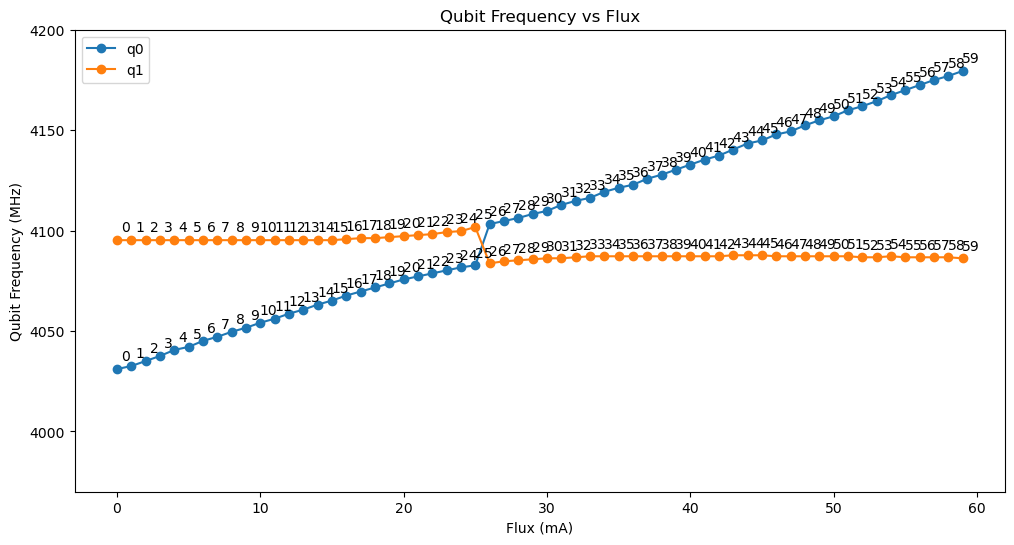

In [234]:
# q1_flux = np.array(flux_array).T[2]
# detuning = (freqs_q2 - freqs_q1) * 1000 # MHz

# data_path = global_data_path + "\\"
# data_files1 = []
# for i in range(len(q1_flux)):
#     try:
#         temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q1_2025-04-14.h5'
#         with SlabFile(temp_file, 'r') as f:
#             data_files1.append(temp_file)
#     except:
#         i-=8
#         temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q1_2025-04-15.h5'
#         # print(temp_file)
#         data_files1.append(temp_file)

qubit1_freqs = []

for i, data in enumerate(data_files1):
    with SlabFile(data, 'r') as f:
        freqs = array(f['fpts'])[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)

    # qubit1_freqs.append(freqs[np.argmax(amps)])
    
    if i < 26:
        indices = np.where((freqs >= 4095) & (freqs <= 4110))[0]  # indices of the frequency range
        qubit1_freqs.append(freqs[indices][np.argmax(amps[indices])])
    # elif i < 31:
    #     indices = np.where((freqs >= 4095) & (freqs <= 4105))[0]  # indices of the frequency range
    #     qubit1_freqs.append(freqs[indices][np.argmax(amps[indices])])
    # elif i < 35:
    #     indices = np.where((freqs >= 4090) & (freqs <= 4093))[0]  # indices of the frequency range
    #     qubit1_freqs.append(freqs[indices][np.argmax(amps[indices])])
    else:
        indices = np.where((freqs <= 4100) & (freqs >= 4070))[0]  # indices of the frequency range
        qubit1_freqs.append(freqs[indices][np.argmax(amps[indices])])
        
    # print('\n data path:', data)
labels = True
plt.figure(figsize=(12,6))
# plt.plot(detuning, qubit0_freqs, marker='o', label = 'q1')
# plt.plot(detuning, qubit1_freqs, marker='o', label = 'q2')
if labels:
    plt.plot(qubit0_freqs, marker='o', label = 'q0')
    plt.plot(qubit1_freqs, marker='o', label = 'q1')
    for i in range(len(q1_flux)):
        txt = str(i)
        plt.annotate(txt, (i, qubit0_freqs[i]), textcoords="offset points", xytext=(6,6), ha='center')
        plt.annotate(txt, (i, qubit1_freqs[i]), textcoords="offset points", xytext=(6,6), ha='center')
else:
    plt.plot(q1_flux, qubit0_freqs, marker='o', label = 'q0')
    plt.plot(q1_flux, qubit1_freqs, marker='o', label = 'q1')

# plt.xlabel('Detuning (MHz) [Q2 - Q1]')
plt.xlabel('Flux (mA)')
plt.ylabel('Qubit Frequency (MHz)')
plt.title('Qubit Frequency vs Flux')
plt.ylim(3970, 4200)
plt.legend()

plt.show()

In [94]:
# DATA CORRECTIONS.
qubit0_freqs[33] = 4176.8
qubit0_freqs[32] = 4196.5
qubit1_freqs[31] = 4178
qubit1_freqs[35] = 4193.4

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(detuning, qubit0_freqs, marker='o', label = 'q0')
plt.scatter(detuning, qubit1_freqs, marker='o', label = 'q1')
plt.xlabel('Detuning (MHz) [Q1 - Q0]')
plt.ylabel('Qubit Frequency (MHz)')
plt.title('Qubit Frequency vs Detuning')
plt.legend()

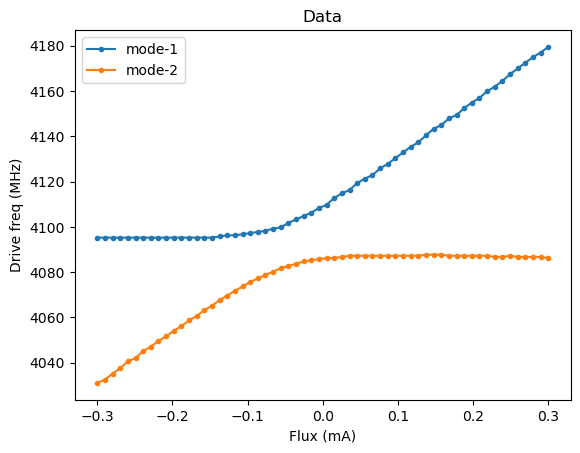

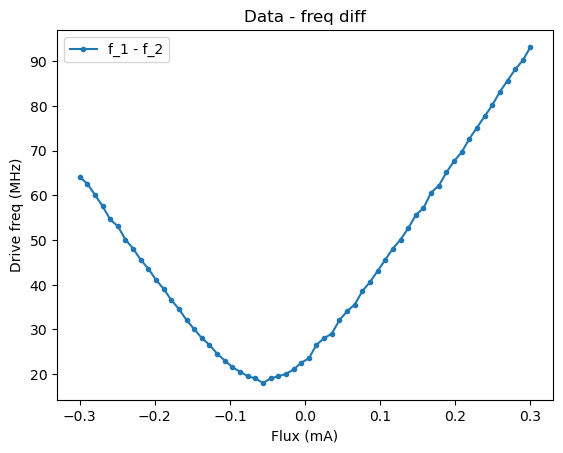

The smallest freq diff is 18.04 MHz
Estimated coupling = 9.02 MHz
minimum occurs at index 24


In [235]:
index = 26
f_low = np.array(qubit0_freqs[0:index] + qubit1_freqs[index:])
f_high = np.array(qubit1_freqs[0:index] + qubit0_freqs[index:])

plt.plot(q1_flux,f_high, '.-', label = 'mode-1')
plt.plot(q1_flux,f_low, '.-', label = 'mode-2')
plt.legend()
plt.title('Data')
plt.ylabel('Drive freq (MHz)')
# plt.xlabel('Detuning (MHz)')
plt.xlabel('Flux (mA)')
plt.show()

plt.plot(q1_flux,f_high - f_low, '.-', label = 'f_1 - f_2')
plt.legend()
plt.title('Data - freq diff')
plt.ylabel('Drive freq (MHz)')
# plt.xlabel('Detuning (MHz)')
plt.xlabel('Flux (mA)')
# plt.axvline(q1_flux[-18])
plt.show()
min_delta = np.min(f_high - f_low)
print('The smallest freq diff is %.2f MHz' %min_delta)
print('Estimated coupling = %.2f MHz' %(min_delta/2))

delta = f_high - f_low

min_index = np.argmin(delta)

print('minimum occurs at index', min_index) 

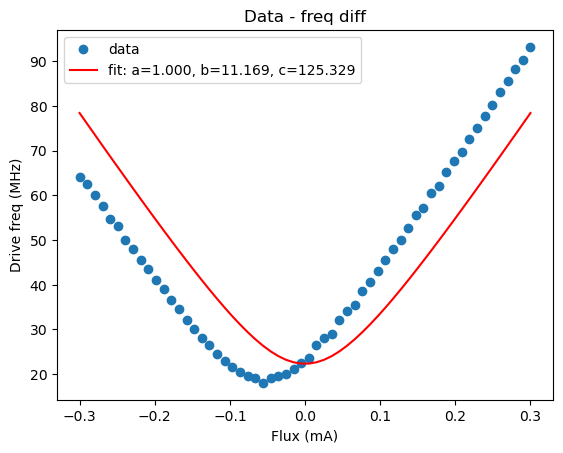

J = 5.58 MHz


In [297]:
# fit to a parabola
x = np.array(q1_flux)
y = np.array(delta)

# fit function
def parabola(x, a, b, c):
    return 2 * np.sqrt(b**2 + (c*x)**2)

# scipy.optimize.curve_fit(parabola, x, y, p0=[1, 1, 1])
# fit result
popt, pcov = scipy.optimize.curve_fit(parabola, x, y)
# plot the data and the fit
plt.plot(x, y, 'o', label='data')
plt.plot(x, parabola(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('Flux (mA)')
plt.ylabel('Drive freq (MHz)')
plt.legend()
plt.title('Data - freq diff')
plt.show()

print('J = %.2f MHz' %(popt[1] / 2))

#### Plotting Raw qubit spec data for each qubit

4088.459052658081


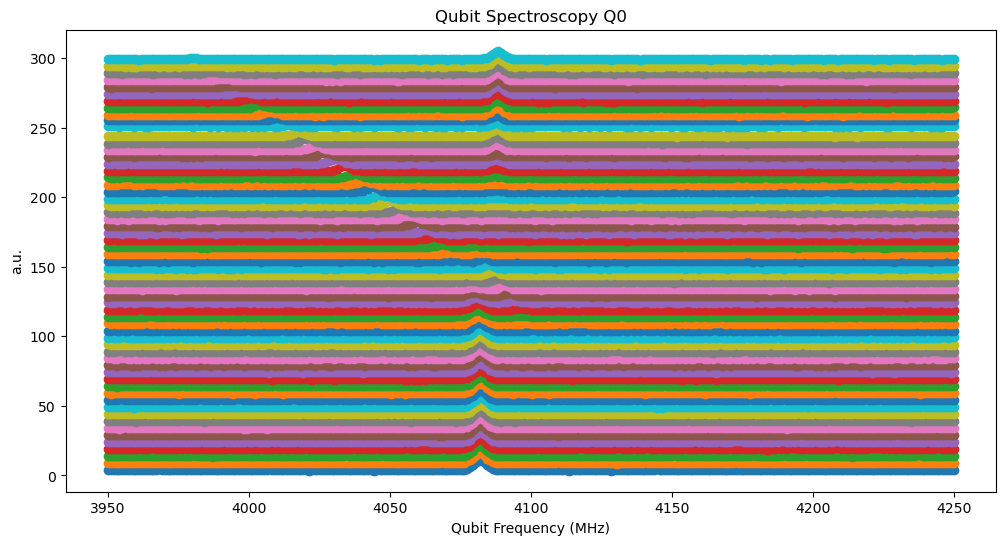

3981.103126144409


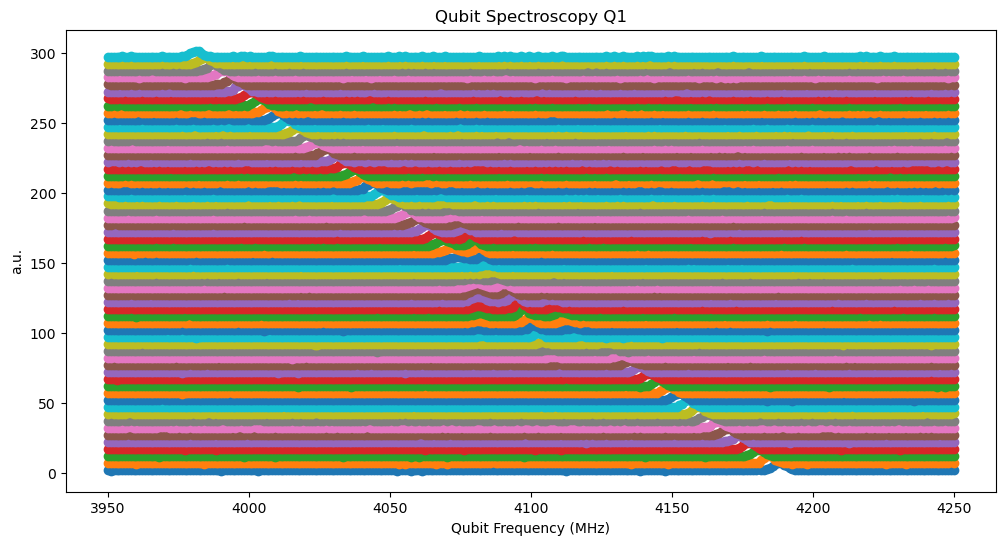

In [ ]:
data_path = global_data_path + "\\"
# print('\n data path:', data)
plt.figure(figsize=(12,6))
for i in range(len(flux_array)):
        data_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q0_2025-0-27.h5'

        with SlabFile(data_file, 'r') as f:
                freqs = array(f['fpts'])[0]
                I = array(f['avgi'])[0]
                Q = array(f['avgq'])[0]
                amps = array(f['amps'])[0]+5*i
                # fit_result = f.attrs['fit_result']
                # fit_result = json.loads(fit_result)
                config = f.attrs['config']
                config = json.loads(config)

        plt.plot(freqs, amps, marker='o')
plt.title('Qubit Spectroscopy Q0')
plt.ylabel("a.u.")
plt.xlabel("Qubit Frequency (MHz)")
# plt.axvline(freqs[np.argmax(amps)])
print(freqs[np.argmax(amps)])
# plt.xlim(4050, 4150)
plt.show()

plt.figure(figsize=(12,6))
for i in range(len(flux_array)):
        data_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q1_2025-03-27.h5'

        with SlabFile(data_file, 'r') as f:
                freqs = array(f['fpts'])[0]
                I = array(f['avgi'])[0]
                Q = array(f['avgq'])[0]
                amps = array(f['amps'])[0]+5*i
                # fit_result = f.attrs['fit_result']
                # fit_result = json.loads(fit_result)
                config = f.attrs['config']
                config = json.loads(config)

        plt.plot(freqs, amps, marker='o')
plt.title('Qubit Spectroscopy Q1')
plt.ylabel("a.u.")
plt.xlabel("Qubit Frequency (MHz)")
# plt.axvline(freqs[np.argmax(amps)])
print(freqs[np.argmax(amps)])
# plt.xlim(4050, 4150)
plt.show()

#### Now getting the 2D data

In [215]:
global_data_path = r"M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250414 - Santi - RFSoC tprocv2 - char4100MHz"
expt_path = r"\q6q7 - avoided_crossing"
global_data_path = global_data_path + expt_path
data_path = global_data_path + "\\"
data_files0 = []
q1 = 6
q2 = 7
date1 = '2025-04-16'
date2 = '2025-04-16'
index_shift = 0
for i in range(len(q1_flux)):
    try:
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(q1) + '_' + date1 + '.h5'
        with SlabFile(temp_file, 'r') as f:
            data_files0.append(temp_file)
    except:
        i-=index_shift
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(q1) + '_' + date2 + '.h5'
        # print(temp_file)
        data_files0.append(temp_file)

# data_path = r"M:/malab/_Data/20250130 - Santi - RFSoC tprocv2 - LL8qubit J meas Q1 Q2/data/third_iteration/"
data_files1 = []
for i in range(len(q1_flux)):
    try:
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(q2) + '_' + date1 + '.h5'
        with SlabFile(temp_file, 'r') as f:
            data_files1.append(temp_file)
    except:
        i-=index_shift
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(q2) + '_' + date2 + '.h5'
        # print(temp_file)
        data_files1.append(temp_file)

qubit0_freqs = []
qubit1_freqs = []
freq_pts0 = []
amp_pts0 = []
freq_pts1 = []
amp_pts1 = []

for i, data in enumerate(data_files0):
    with SlabFile(data, 'r') as f:
        freqs = array(f['fpts'])[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)
    freq_pts0.append(freqs)
    amp_pts0.append(amps)

for i, data in enumerate(data_files1):
    with SlabFile(data, 'r') as f:
        freqs = array(f['fpts'])[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)
    freq_pts1.append(freqs)
    amp_pts1.append(amps)

freq_pts0 = np.array(freq_pts0)
amp_pts0 = np.array(amp_pts0)
freq_pts1 = np.array(freq_pts1)
amp_pts1 = np.array(amp_pts1)

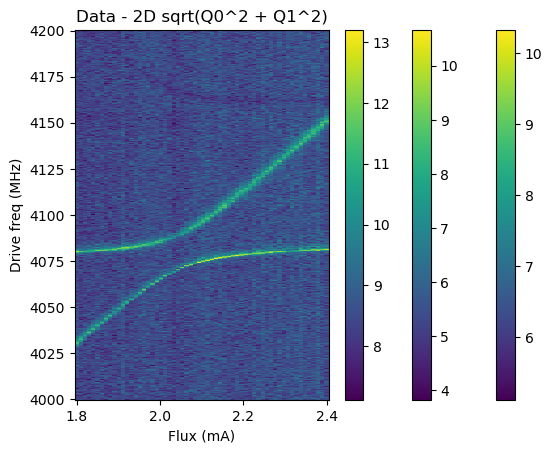

In [145]:
cmap = 'viridis'
plt.pcolor(q1_flux, freq_pts0.T, amp_pts0.T, cmap = cmap)
# plt.pcolor(q1_flux, freq_pts1.T, amp_pts1.T)
plt.colorbar()
plt.title('Data - 2D Q0')
plt.ylabel('Drive freq (MHz)')
# plt.xlabel('Detuning (MHz)')
plt.xlabel('Flux (mA)')
# plt.ylim(4050, 4150)
# plt.show()

# now reverse to see the other first:
plt.pcolor(q1_flux, freq_pts1.T, amp_pts1.T, cmap = cmap)
# plt.pcolor(q1_flux, freq_pts0.T, amp_pts0.T)
plt.colorbar()
plt.title('Data - 2D Q1')
plt.ylabel('Drive freq (MHz)')
# plt.xlabel('Detuning (MHz)')
plt.xlabel('Flux (mA)')
# plt.ylim(4050, 4150)
# plt.show()

plt.pcolor(q1_flux, freq_pts1.T, np.sqrt(amp_pts0.T**2 + amp_pts1.T**2), cmap = cmap)
# plt.pcolor(q1_flux, freq_pts0.T, amp_pts0.T)
plt.colorbar()
plt.title('Data - 2D sqrt(Q0^2 + Q1^2)')
plt.ylabel('Drive freq (MHz)')
# plt.xlabel('Detuning (MHz)')
plt.xlabel('Flux (mA)')
# plt.ylim(4050, 4150)
plt.show()

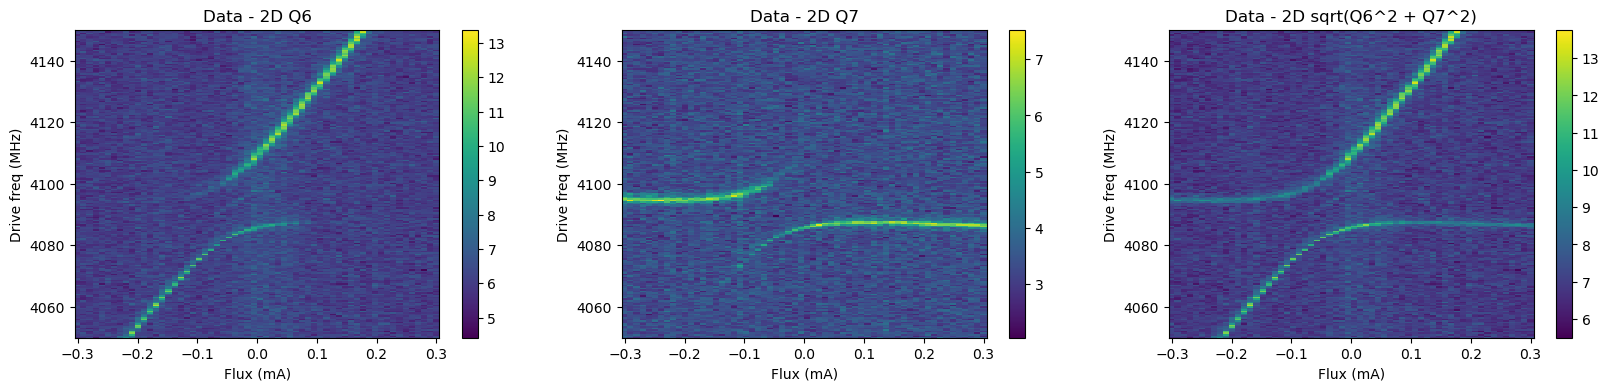

In [216]:
# plot the 3 plots above using subplots in one row
plt.figure(figsize=(20,4))
plt.subplot(1, 3, 1)
plt.pcolor(q1_flux, freq_pts0.T, amp_pts0.T, cmap = cmap)
plt.colorbar()
plt.title('Data - 2D Q' + str(q1))
plt.ylabel('Drive freq (MHz)')
plt.xlabel('Flux (mA)')
plt.ylim(4050, 4150)
plt.subplot(1, 3, 2)
plt.pcolor(q1_flux, freq_pts1.T, amp_pts1.T, cmap = cmap)
plt.colorbar()
plt.title('Data - 2D Q' + str(q2))
plt.ylabel('Drive freq (MHz)')
plt.xlabel('Flux (mA)')
plt.ylim(4050, 4150)
plt.subplot(1, 3, 3)
plt.pcolor(q1_flux, freq_pts1.T, np.sqrt(amp_pts0.T**2 + amp_pts1.T**2), cmap = cmap)
plt.colorbar()
plt.title('Data - 2D sqrt(Q' + str(q1) + '^2 + Q' + str(q2) + '^2)')
plt.ylabel('Drive freq (MHz)')
plt.xlabel('Flux (mA)')
plt.ylim(4050, 4150)
plt.show()


## T1 for multiple qubtis

[['M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250221 - fullchipchar - flux/00000_T1_ge_mux_Q0_2025-02-21.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250221 - fullchipchar - flux/00001_T1_ge_mux_Q0_2025-02-21.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250221 - fullchipchar - flux/00002_T1_ge_mux_Q0_2025-02-21.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250221 - fullchipchar - flux/00003_T1_ge_mux_Q0_2025-02-21.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250221 - fullchipchar - flux/00004_T1_ge_mux_Q0_2025-02-21.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250221 - fullchipchar - flux/00005_T1_ge_mux_Q0_2025-02-21.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250221 - fullchipchar - flux/00006_T1_ge_mux_Q0_2025-02-21.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 -

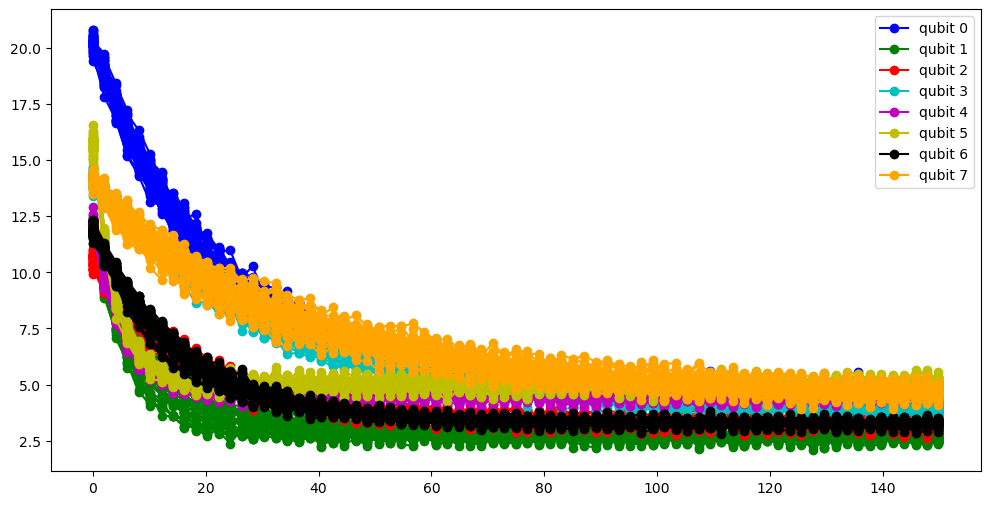

Qubit 0: 21.79 us +/- 1.51 us
Qubit 1: 11.23 us +/- 3.72 us
Qubit 2: 18.26 us +/- 1.32 us
Qubit 3: 31.63 us +/- 2.49 us
Qubit 4: 5.46 us +/- 0.31 us
Qubit 5: 3.96 us +/- 0.16 us
Qubit 6: 15.56 us +/- 1.35 us
Qubit 7: 35.85 us +/- 3.95 us


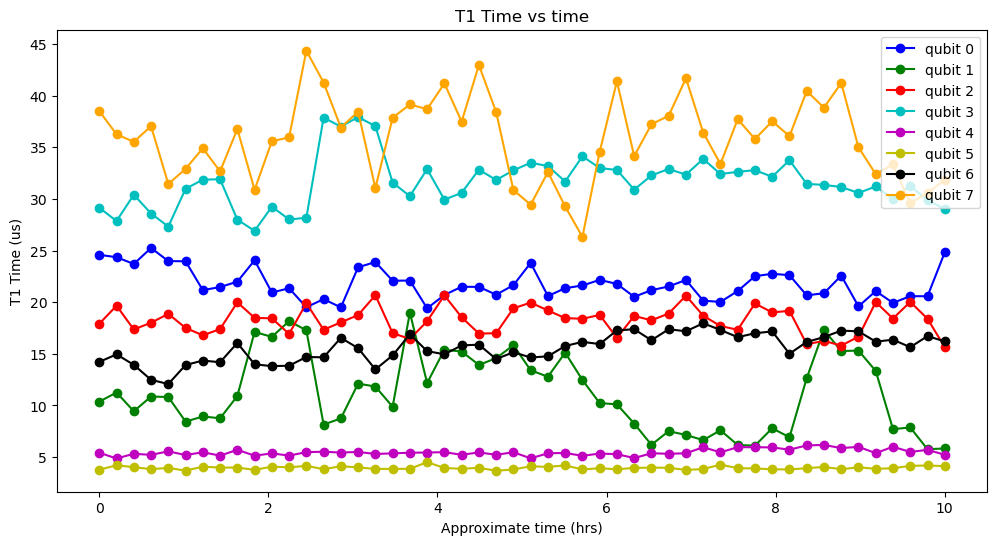

In [14]:
data_path = r"M:\malab\_Data\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\20250221 - fullchipchar - flux/"
data_files = []

for qubit in range(8):
    day = 21
    offset_index = 0
    data_files.append([])
    for i in range(50):
        try:
            i -= offset_index
            temp_file = data_path + str(f"{i:05d}") + '_T1_ge_mux_Q' + str(qubit) + '_2025-02-'  + str(day) + '.h5'
            with SlabFile(temp_file, 'r') as f:
                k = 0
            # print(temp_file)
        except:
            offset_index = i
            i -= offset_index
            day+=1
            temp_file = data_path + str(f"{i:05d}") + '_T1_ge_mux_Q' + str(qubit) + '_2025-02-'  + str(day) + '.h5'
            with SlabFile(temp_file, 'r') as f:
                k = 0
        
        data_files[qubit].append(temp_file)

# plt.figure(figsize=(12,6))

SS = False # did we do SingleShot for ge normalization?
num_qubits = 8
t1_times = []
print(data_files)
plt.figure(figsize=(12,6))
t1_times = np.zeros((num_qubits, len(data_files[0])))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
for qubit in range(num_qubits):
    for i, data in enumerate(data_files[qubit]):
        with SlabFile(data, 'r') as f:
            delay_times = array(f['delay_times'])[0]
            I = array(f['avgi'])[0]
            Q = array(f['avgq'])[0]
            amps = array(f['amps'])[0]
            # fit_result = f.attrs['fit_result']
            # fit_result = json.loads(fit_result)
            config = f.attrs['config']
            config = json.loads(config)

            if SS == 'True':
                Ig = array(f['I_g'])[0]
                Qg = array(f['Q_g'])[0]
                Ie = array(f['I_e'])[0]
                Qe = array(f['Q_e'])[0]
    # pp.pprint(config)
    # print('\n data path:', data)
    # delay_times -= config['qubit_length_ge']
    # plt.plot(delay_times, amps, marker='o')
    # fit = Fit()
    # fit_result = fit.T1(delay_times, amps, plot=False)
    # fit_result = {
    #         "T1": fit_result['T1'],
    #         "amp": fit_result['amp'],
    #         "final_offset": fit_result['final_offset']
    #     }
    # t1_times.append(fit_result['T1'][0])
    # for qubit in range(num_qubits):
        if i == 0:
            plt.plot(delay_times, amps, marker='o', color = colors[qubit], label = 'qubit ' + str(qubit))
        else:
            plt.plot(delay_times, amps, marker='o', color = colors[qubit])
        fit = Fit()
        fit_results = fit.T1(delay_times, amps.T[0], plot=False)
        # pp.pprint(fit_results)
        t1_times[qubit][i] = fit_results['T1'][0]
plt.legend(loc = 'upper right')
plt.show()
# plt.ylabel("a.u.")
# plt.xlabel(r"Delay Time ($\mu$s)")
# plt.title(r'T1 Experiment')
# plt.legend(loc = 'upper right')
# plt.show()
approx_tot_time = len(t1_times[0])*8*90 / 60 / 60 # 1 min 30 sec * point / 60 sec / 60 min = hours
time_axis = np.linspace(0, approx_tot_time, len(t1_times[0]))
plt.figure(figsize=(12,6))
for qubit in range(num_qubits):
    # if qubit !=4 and qubit != 2:
    plt.plot(time_axis, t1_times[qubit], marker='o', color = colors[qubit], label='qubit ' + str(qubit))
plt.xlabel('Approximate time (hrs)')
plt.ylabel('T1 Time (us)')
plt.title('T1 Time vs time')
plt.legend(loc = 'upper right')

# finding the average T1 time and the standard deviation for each qubit
t1_avg = []
t1_std = []
for qubit in range(num_qubits):
    t1_avg.append(np.mean(t1_times[qubit]))
    t1_std.append(np.std(t1_times[qubit]))
    print('Qubit %d: %.2f us' %(qubit, t1_avg[qubit]) + ' +/- %.2f us' %t1_std[qubit])
    # print('Qubit %d: %.2f us' %(qubit, t1_std[qubit]))

# print('Average T1 time for each qubit:')
# print(t1_avg)
# print('Standard deviation for each qubit:')
# print(t1_std)


### T1 - full mux

['M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250219 - fullchipchar/00000_T1_mux_ge_2025-02-19.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250219 - fullchipchar/00001_T1_mux_ge_2025-02-19.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250219 - fullchipchar/00002_T1_mux_ge_2025-02-19.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250219 - fullchipchar/00003_T1_mux_ge_2025-02-19.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250219 - fullchipchar/00004_T1_mux_ge_2025-02-19.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250219 - fullchipchar/00005_T1_mux_ge_2025-02-19.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250219 - fullchipchar/00006_T1_mux_ge_2025-02-19.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250219 - fullchipchar/00007_T1_mux_ge_2025-02-19.h5',

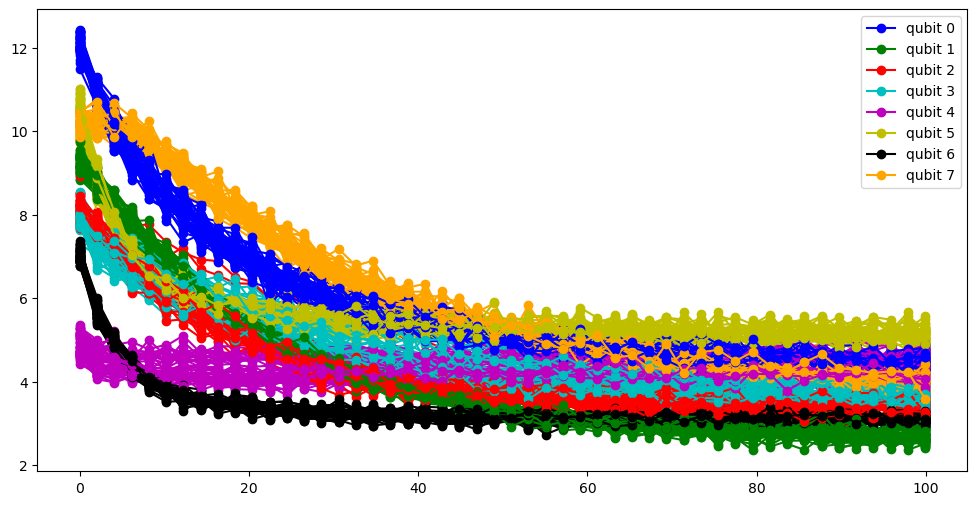

Qubit 0: 18.37 us +/- 1.13 us
Qubit 1: 23.03 us +/- 1.03 us
Qubit 2: 19.37 us +/- 2.04 us
Qubit 3: 26.99 us +/- 4.25 us
Qubit 4: -451565.86 us +/- 1914603.73 us
Qubit 5: 6.44 us +/- 0.43 us
Qubit 6: 5.83 us +/- 0.33 us
Qubit 7: 36.92 us +/- 2.13 us


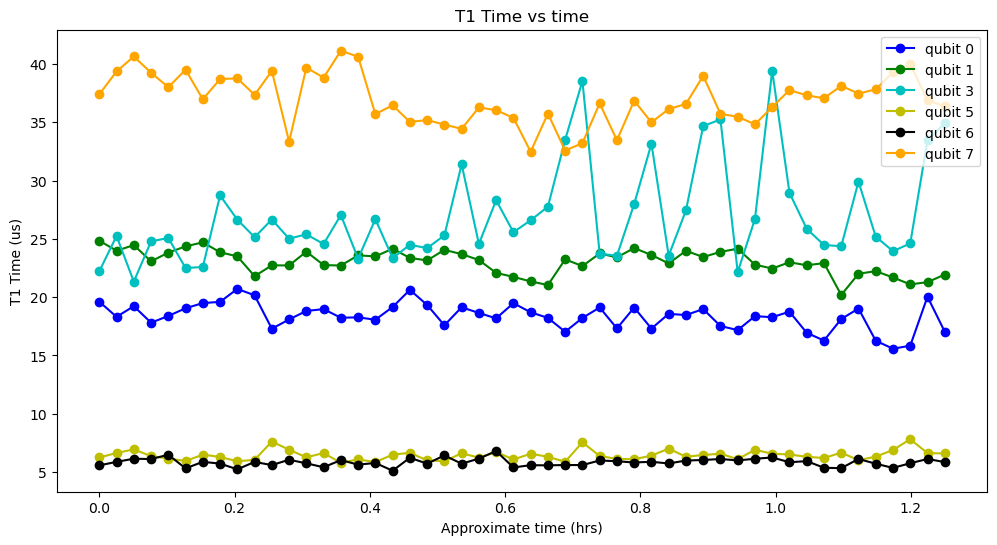

In [17]:
data_path = r"M:\malab\_Data\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\20250219 - fullchipchar/"
data_files = []
day = 19
offset_index = 0
for i in range(50):
    try:
        i -= offset_index
        temp_file = data_path + str(f"{i:05d}") + '_T1_mux_ge_2025-02-'  + str(day) + '.h5'
        with SlabFile(temp_file, 'r') as f:
            k = 0
    except:
        offset_index = i
        i -= offset_index
        day+=1
        temp_file = data_path + str(f"{i:05d}") + '_T1_mux_ge_2025-02-'  +  str(day) + '.h5'
        
    data_files.append(temp_file)

# plt.figure(figsize=(12,6))

SS = False # did we do SingleShot for ge normalization?
num_qubits = 8
t1_times = []
print(data_files)
plt.figure(figsize=(12,6))
t1_times = np.zeros((num_qubits, len(data_files)))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
for i, data in enumerate(data_files):

    with SlabFile(data, 'r') as f:
        delay_times = array(f['delay_times'])[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)

        if SS == 'True':
            Ig = array(f['I_g'])[0]
            Qg = array(f['Q_g'])[0]
            Ie = array(f['I_e'])[0]
            Qe = array(f['Q_e'])[0]
    # pp.pprint(config)

    # print('\n data path:', data)
    # delay_times -= config['qubit_length_ge']
    # plt.plot(delay_times, amps, marker='o')
    # fit = Fit()
    # fit_result = fit.T1(delay_times, amps, plot=False)
    # fit_result = {
    #         "T1": fit_result['T1'],
    #         "amp": fit_result['amp'],
    #         "final_offset": fit_result['final_offset']
    #     }
    # t1_times.append(fit_result['T1'][0])
    for qubit in range(num_qubits):
        if i == 0:
            plt.plot(delay_times, amps[qubit], marker='o', color = colors[qubit], label = 'qubit ' + str(qubit))
        else:
            plt.plot(delay_times, amps[qubit], marker='o', color = colors[qubit])
        fit = Fit()
        fit_results = fit.T1(delay_times, amps[qubit].T[0], plot=False)
        # pp.pprint(fit_results)
        t1_times[qubit][i] = fit_results['T1'][0]
plt.legend(loc = 'upper right')
plt.show()
# plt.ylabel("a.u.")
# plt.xlabel(r"Delay Time ($\mu$s)")
# plt.title(r'T1 Experiment')
# plt.legend(loc = 'upper right')
# plt.show()
approx_tot_time = len(t1_times[0])*90 / 60 / 60 # 1 min 30 sec * point / 60 sec / 60 min = hours
time_axis = np.linspace(0, approx_tot_time, len(t1_times[0]))
plt.figure(figsize=(12,6))
for qubit in range(num_qubits):
    if qubit !=4 and qubit != 2:
        plt.plot(time_axis, t1_times[qubit], marker='o', color = colors[qubit], label='qubit ' + str(qubit))
plt.xlabel('Approximate time (hrs)')
plt.ylabel('T1 Time (us)')
plt.title('T1 Time vs time')
plt.legend(loc = 'upper right')

# finding the average T1 time and the standard deviation for each qubit
t1_avg = []
t1_std = []
for qubit in range(num_qubits):
    t1_avg.append(np.mean(t1_times[qubit]))
    t1_std.append(np.std(t1_times[qubit]))
    print('Qubit %d: %.2f us' %(qubit, t1_avg[qubit]) + ' +/- %.2f us' %t1_std[qubit])
    # print('Qubit %d: %.2f us' %(qubit, t1_std[qubit]))

# print('Average T1 time for each qubit:')
# print(t1_avg)
# print('Standard deviation for each qubit:')
# print(t1_std)


In [15]:
print(t1_avg)

[21.793388004018333, 11.225217555540512, 18.259691204944072, 31.630928008468057, 5.460272050732124, 3.955745306253823, 15.564853366984455, 35.84826410767418]


Text(0.5, 1.0, 'Temp vs time')

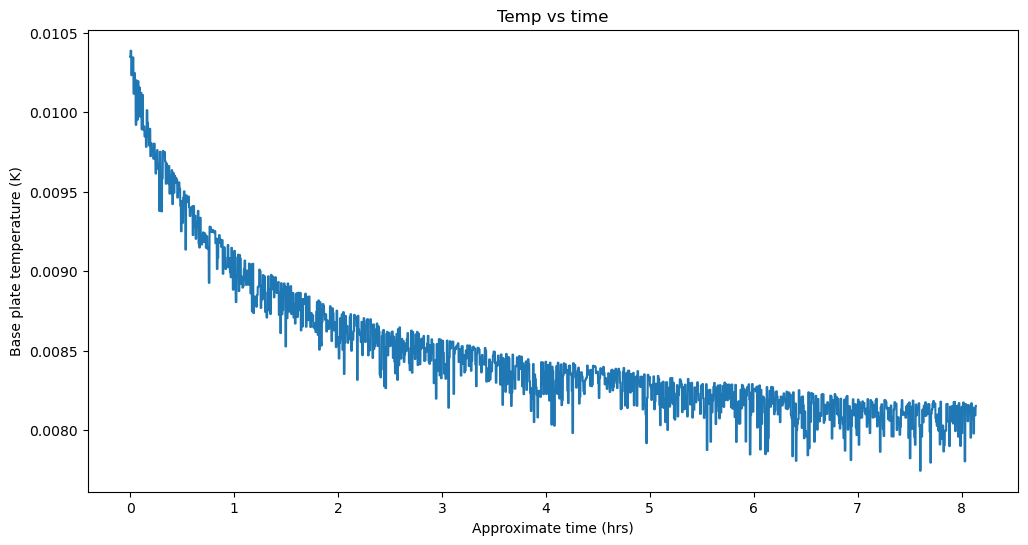

In [56]:
data_array = []

# Open the file and read line by line
with open("20250211 - fridge_temp.txt", "r") as file:
    for line in file:
        parts = line.strip().split(",")  # Split by commas
        if len(parts) == 3:  # Ensure correct format
            date, time, value = parts
            data_array.append([date, time, value])  # Convert value to float

data_array = np.array(data_array).T

temp_array = np.zeros(len(data_array[2]))
for i in range(len(data_array[2])):
    temp_array[i] = float(data_array[2][i])

# Print the extracted data
time_axis = np.linspace(0, approx_tot_time, len(data_array[1]))
plt.figure(figsize=(12,6))
plt.plot(time_axis, temp_array)
plt.xlabel('Approximate time (hrs)')
plt.ylabel('Base plate temperature (K)')
plt.title('Temp vs time')

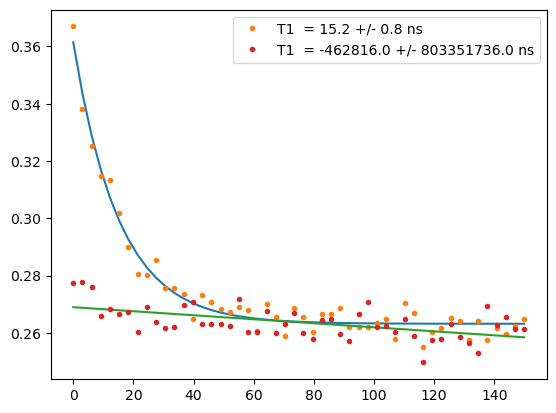

In [104]:
data_path = r"M:/malab/_Data/20250127 - Santi - RFSoC tprocv2 - LL8qubit J meas Q1 Q2/data/collective_decay/"
# print('\n data path:', data)
expt_index = 11

data_file = data_path + str(f"{expt_index:05d}") + '_T1_ge_Q0_2025-01-31.h5'

with SlabFile(data_file, 'r') as f:
    # print(f.keys())
    delay_times = array(f['delay_times'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

    if SS == 'True':
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
# pp.pprint(config)

# print('\n data path:', data)
delay_times -= config['qubit_length_ge']
# plt.plot(delay_times, amps, marker='o', label='data (flux = ' + str(round(flux_quanta_array[i],2)) + 'mA)')
fit = Fit()
fit_result = fit.T1(delay_times, amps, plot=True)
fit_result = {
        "T1": fit_result['T1'],
        "amp": fit_result['amp'],
        "final_offset": fit_result['final_offset']
    }
t1_times.append(fit_result['T1'][0])
# plt.plot(delay_times, amps)

data_file = data_path + str(f"{expt_index:05d}") + '_T1_ge_Q1_2025-01-28.h5'
with SlabFile(data_file, 'r') as f:
    # print(f.keys())
    delay_times = array(f['delay_times'])[0]
    I = array(f['avgi'])[0]
    Q = array(f['avgq'])[0]
    amps = array(f['amps'])[0]
    # fit_result = f.attrs['fit_result']
    # fit_result = json.loads(fit_result)
    config = f.attrs['config']
    config = json.loads(config)

    if SS == 'True':
        Ig = array(f['I_g'])[0]
        Qg = array(f['Q_g'])[0]
        Ie = array(f['I_e'])[0]
        Qe = array(f['Q_e'])[0]
# pp.pprint(config)

# print('\n data path:', data)
delay_times -= config['qubit_length_ge']
# plt.plot(delay_times, amps, marker='o', label='data (flux = ' + str(round(flux_quanta_array[i],2)) + 'mA)')
fit = Fit()
fit_result = fit.T1(delay_times, amps, plot=True)
fit_result = {
        "T1": fit_result['T1'],
        "amp": fit_result['amp'],
        "final_offset": fit_result['final_offset']
    }
t1_times.append(fit_result['T1'][0])
# plt.plot(delay_times, amps)

plt.show()
# plt.plot(delay_times, I)
# plt.plot(delay_times, Q)

### quick T1 comparison

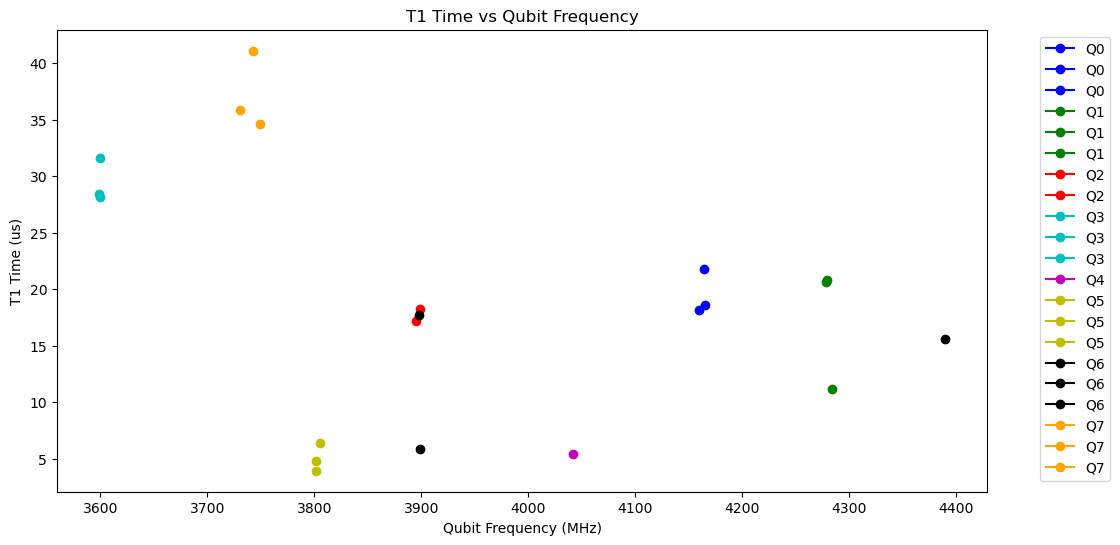

In [18]:
qubit_freqs_1 = [4164.824174405949, 4278.241077226054, 3895.3910521297034, 3599.4233069267802, 3650.2642436053575, 3804.839099013863, 3898.9339605560162, 3748.894369723996]
t1_times_1 = [18.6143487766599, 20.63842108501375, 17.19976987990508, 28.146478148292204, -276827.44188414427, 6.3636624207206225, 5.896900723568519, 34.57676860248962]

qubit_freqs_2 = [4159.794505021956, 4279.218994104402, 3896.4087773095616, 3598.885740623181, 4044.2599662544476, 3801.9729544883253, 3897.4345207558213, 3742.472184042894]
t1_times_2 = [18.152152552351744, 20.831886585489674, -17510.807528531193, 28.39322336598177, -238661.81144114808, 4.796641941302093, 17.689375020855934, 41.09753917914823]

qubit_freqs_3 = [4164.333597343298, 4283.918824033773, 3898.413719222572, 3599.132678108288, 4041.82477753916, 3801.116640066964, 4389.415805307179, 3730.5391345596436]
t1_times_3 = [21.793388004018333, 11.225217555540512, 18.259691204944072, 31.630928008468057, 5.460272050732124, 3.955745306253823, 15.564853366984455, 35.84826410767418]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

plt.figure(figsize=(12,6))
for qubit in range(8):
    if t1_times_1[qubit] > 0:
        plt.plot(qubit_freqs_1[qubit], t1_times_1[qubit], marker='o', label = 'Q' + str(qubit), color = colors[qubit])
    if t1_times_2[qubit] > 0:
        plt.plot(qubit_freqs_2[qubit], t1_times_2[qubit], marker='o', label = 'Q' + str(qubit), color = colors[qubit])
    if t1_times_3[qubit] > 0:
        plt.plot(qubit_freqs_3[qubit], t1_times_3[qubit], marker='o', label = 'Q' + str(qubit), color = colors[qubit])
plt.xlabel('Qubit Frequency (MHz)')
plt.ylabel('T1 Time (us)')
plt.title('T1 Time vs Qubit Frequency')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


# Resonator Freq vs DC coil

[['M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250225 - t1 vs flux - q0/00000_res_spec_ge_Q0_2025-02-25.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250225 - t1 vs flux - q0/00001_res_spec_ge_Q0_2025-02-25.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250225 - t1 vs flux - q0/00002_res_spec_ge_Q0_2025-02-25.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250225 - t1 vs flux - q0/00003_res_spec_ge_Q0_2025-02-25.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250225 - t1 vs flux - q0/00004_res_spec_ge_Q0_2025-02-25.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250225 - t1 vs flux - q0/00005_res_spec_ge_Q0_2025-02-25.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250225 - t1 vs flux - q0/00006_res_spec_ge_Q0_2025-02-25.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas

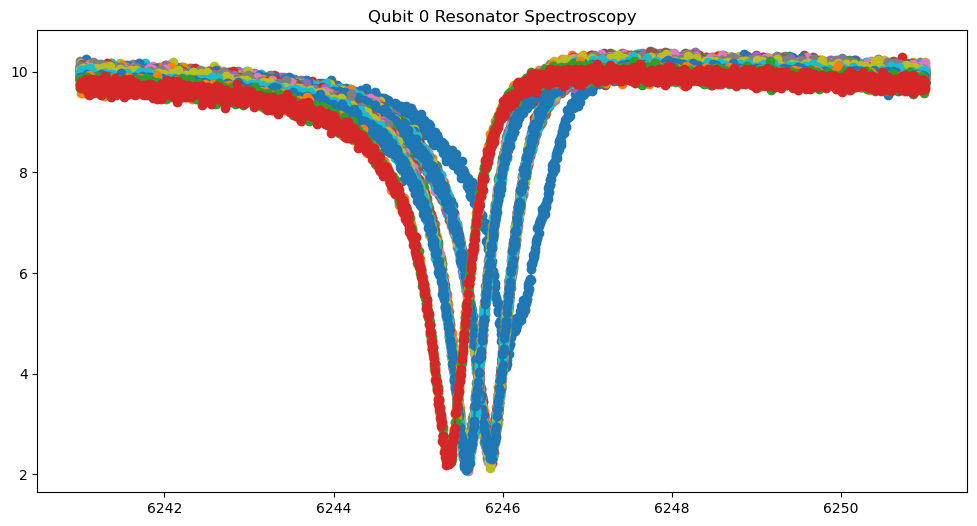

In [30]:
# flux_array = np.arange(0, 5, 0.2)
flux_array = np.arange(-1, 5, 0.1)[0:34]
num_qubits = 1
data_path = r"M:\malab\_Data\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\20250225 - t1 vs flux - q0/"
data_files = []
for qubit in range(num_qubits):
    day = 25
    offset_index = 0
    data_files.append([])
    for i in range(len(flux_array)):
        try:
            i -= offset_index
            temp_file = data_path + str(f"{i:05d}") + '_res_spec_ge_Q' + str(qubit) + '_2025-02-'  + str(day) + '.h5'
            with SlabFile(temp_file, 'r') as f:
                k = 0
            # print(temp_file)
        except:
            offset_index = i
            i -= offset_index
            day+=1
            temp_file = data_path + str(f"{i:05d}") + '_res_spec_ge_Q' + str(qubit) + '_2025-02-'  + str(day) + '.h5'
            with SlabFile(temp_file, 'r') as f:
                k = 0
        
        data_files[qubit].append(temp_file)
print(data_files)
res_freq = []
freq_data_list = []
amp_data_list = []

for qubit in range(num_qubits):
    freq_data_list.append([])
    amp_data_list.append([])
    plt.figure(figsize=(12,6))
    for i, data in enumerate(data_files[qubit]):
        with SlabFile(data, 'r') as f:
            freqs = array(f['fpts'])[0]
            amps = array(f['amps'])[0]
            # fit_result = f.attrs['fit_result']
            # fit_result = json.loads(fit_result)
            config = f.attrs['config']
            config = json.loads(config)
            freq_data_list[qubit].append(freqs)
            amp_data_list[qubit].append(amps)

        plt.plot(freqs, amps, marker='o', label = 'data (flux = ' + str(round(flux_array[i],2)) + 'mA)')
    
    plt.title('Qubit ' + str(qubit) + ' Resonator Spectroscopy')
    plt.show()

In [ ]:
f, ax = plt.subplots(8, 1,figsize=(10, 40))

freq_order = [4, 6, 1, 3, 5, 0, 7, 2]

for qubit in range(num_qubits):
    index = freq_order[qubit]
    ax[7-qubit].pcolor(flux_array, np.array(freq_data_list[index]).T, np.array(amp_data_list[index]).T, label = 'Qubit ' + str(index))
    # ax[7-qubit].legend()
    ax[7-qubit].set_ylabel('Resonator Freq (MHz)')
    ax[7-qubit].set_xlabel('DC coil (mA)')
    ax[7-qubit].set_title('Qubit ' + str(index))
    ax[7-qubit].set_xlim(0, 3.2)

# ax[0].xaxis.tick_top()
# ax[0].tick_params(labeltop='off')  # don't put tick labels at the top
# ax[7].xaxis.tick_bottom()

# plt.xlabel('DC ciol (mA)')
# plt.colorbar()
plt.tight_layout()
plt.show()


# Box Mode

['M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250217 - box_mode - q0/00000_Ramsey_ge_Q0_2025-02-17.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250217 - box_mode - q0/00001_Ramsey_ge_Q0_2025-02-17.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250217 - box_mode - q0/00002_Ramsey_ge_Q0_2025-02-17.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250217 - box_mode - q0/00003_Ramsey_ge_Q0_2025-02-17.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250217 - box_mode - q0/00004_Ramsey_ge_Q0_2025-02-17.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250217 - box_mode - q0/00005_Ramsey_ge_Q0_2025-02-17.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250217 - box_mode - q0/00006_Ramsey_ge_Q0_2025-02-17.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250217 - box_mode - q0/00

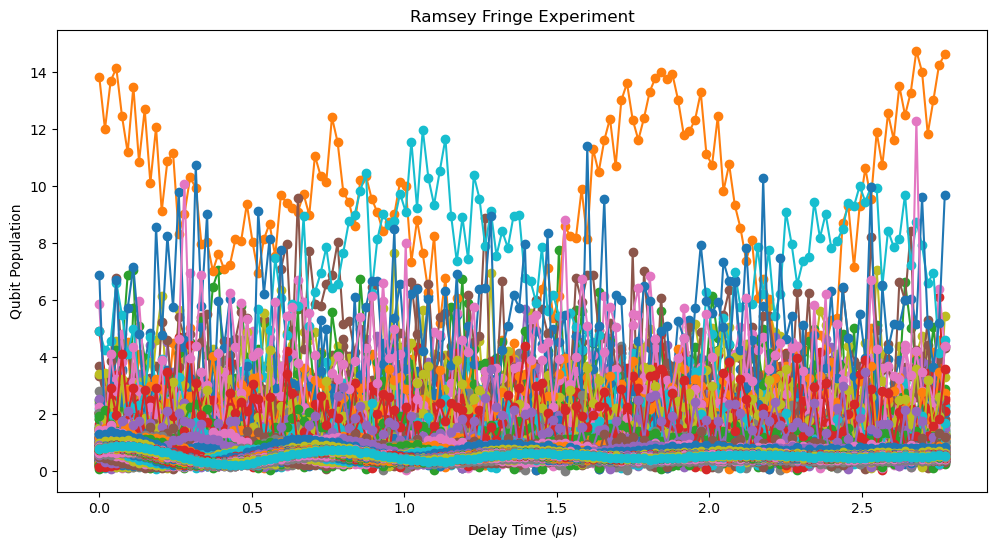

In [291]:
# flux_array = np.arange(0, 5, 0.2)
LO_freqs = np.linspace(0,10,400)

data_path = r"M:\malab\_Data\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\20250217 - box_mode - q0/"
data_files = []
qubit = 0
day = 17
offset_index = 0
for i in range(len(LO_freqs)):
    try:
        i -= offset_index
        temp_file = data_path + str(f"{i:05d}") + '_Ramsey_ge_Q' + str(qubit) + '_2025-02-' + str(day) + '.h5'
        with SlabFile(temp_file, 'r') as f:
            data_files.append(temp_file)
    except:
        offset_index = i
        day += 1
        temp_file = data_path + str(f"{i:05d}") + '_Ramsey_ge_Q' + str(qubit) + '_2025-02-' + str(day) + '.h5'
        with SlabFile(temp_file, 'r') as f:
            data_files.append(temp_file)

print(data_files)
tdata_list = []
ydata_list = []
fits_list = []

SS = 'True'

plt.figure(figsize=(12,6))
for i, data in enumerate(data_files):
    with SlabFile(data, 'r') as f:
        delay_times = array(f['delay_times'])[0]
        delay_times -= delay_times[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)

        if SS == 'True':
            Ig = array(f['I_g'])[0]
            Qg = array(f['Q_g'])[0]
            Ie = array(f['I_e'])[0]
            Qe = array(f['Q_e'])[0]

    if SS == 'True':
        # Normalize data
        e = np.mean((Ie+1j*Qe))
        g = np.mean((Ig+1j*Qg))
        ### Normalization ###
        pop_norm = abs(((I+1j*Q) - g)*(e- g) / abs(e - g)**2)
        ydata = pop_norm
    else:
        ydata = amps

    tdata_list.append(delay_times)
    ydata_list.append(ydata)
    
    plt.plot(delay_times, ydata,marker='o', label='data')

    try:
        fit = Fit()
        fit_results = fit.ramsey(delay_times, ydata, plot=False)
        fits_list.append(fit_results['f'][0])
    except:
        fits_list.append(0)
        
if SS == 'True':
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.xlabel(r"Delay Time ($\mu$s)")
plt.title(r'Ramsey Fringe Experiment')
plt.show()

In [292]:
tdata_list = np.array(tdata_list)
ydata_list = np.array(ydata_list)

# LO_freqs = np.delete(LO_freqs, 199, axis=0)
# LO_freqs = np.delete(LO_freqs, 198, axis=0)

In [183]:
LO_freqs = np.delete(LO_freqs, 116, axis=0)
tdata_list = np.delete(tdata_list, 116, axis=0)
ydata_list = np.delete(ydata_list, 116, axis=0)

LO_freqs = np.delete(LO_freqs, 115, axis=0)
tdata_list = np.delete(tdata_list, 115, axis=0)
ydata_list = np.delete(ydata_list, 115, axis=0)

LO_freqs = np.delete(LO_freqs, 70, axis=0)
tdata_list = np.delete(tdata_list, 70, axis=0)
ydata_list = np.delete(ydata_list, 70, axis=0)

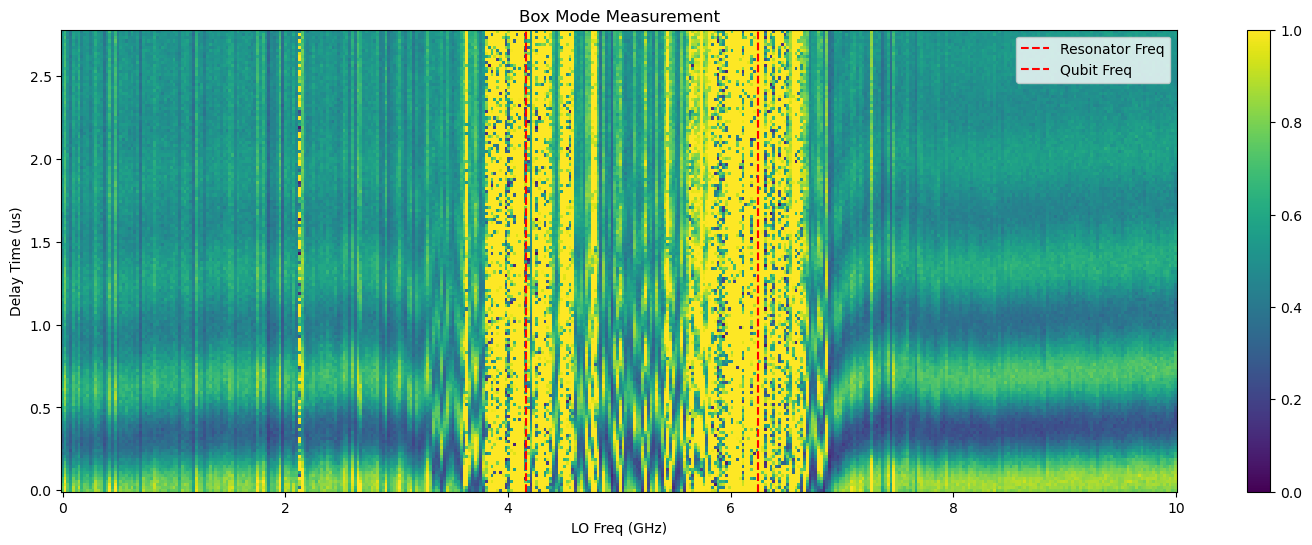

In [293]:
plt.figure(figsize=(18,6))
plt.pcolor(LO_freqs, tdata_list.T, ydata_list.T, vmax=1, vmin=0)
# plt.pcolor(LO_freqs[117:], np.array(tdata_list).T[117:], np.array(ydata_list).T[117:], cmap='hot')
res_freqs = np.array([6.245831574440001, 6.17, 6.3, 6.2, 6.13, 6.23, 6.15, 6.27])
qubit_freqs = np.array([4.163041532408547, 4.27, 3.89, 3.6, 3.65, 3.8, 3.9, 3.75])
for i, res_freq in enumerate(res_freqs):
    if i == 0:
        plt.axvline(res_freq, c='red', linestyle='--', label='Resonator Freq')
    # else:
        # plt.axvline(res_freq, c='black', linestyle='--')
for i, qubit_freq in enumerate(qubit_freqs):
    if i == 0:
        plt.axvline(qubit_freq, c='red', linestyle='--', label='Qubit Freq')
    # else:
        # plt.axvline(qubit_freq, c='black', linestyle='--')
plt.colorbar()
plt.title('Box Mode Measurement')
plt.ylabel('Delay Time (us)')
plt.xlabel('LO Freq (GHz)')
plt.legend()
plt.show()

In [ ]:
print(np.where(LO_freqs == LO_freqs[np.argmax(ydata_list[50])]))

(array([3], dtype=int64),)


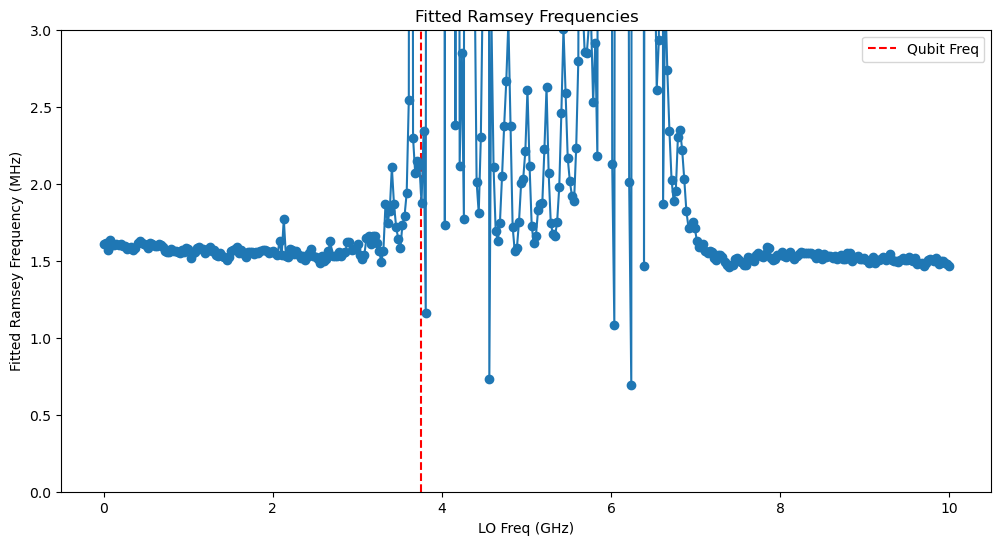

In [294]:
# Fitted frequencies
plt.figure(figsize=(12,6))
plt.title('Fitted Ramsey Frequencies')
plt.ylabel('Fitted Ramsey Frequency (MHz)')
plt.xlabel('LO Freq (GHz)')
# plt.axvline(res_freq, c='red', linestyle='--', label='Resonator Freq')
plt.axvline(qubit_freq, c='red', linestyle='--', label='Qubit Freq')
plt.plot(LO_freqs, np.array(fits_list), marker='o')
plt.ylim(0, 3)
plt.legend()
plt.show()

In [51]:

TRM = array([[ 1.        , -0.11397061, -0.2587036 , -0.28050569, -0.1660616 ,
        -0.07645482, -0.04368518, -0.00588488],
       [ 0.26125137,  1.        , -0.19756347, -0.33937325, -0.27853692,
        -0.19010634, -0.10639071, -0.016038  ],
       [ 0.22152972,  0.12658328,  1.        , -0.31431047, -0.32633708,
        -0.21942528, -0.14925022, -0.07477466],
       [ 0.21795905,  0.1241314 ,  0.04563477,  1.        , -0.35426775,
        -0.27208706, -0.2074165 , -0.11710245],
       [ 0.24686491,  0.14959481,  0.05232058, -0.06130094,  1.        ,
        -0.36099434, -0.28661645, -0.20891156],
       [ 0.24005248,  0.15270144,  0.06368831, -0.0476997 , -0.13006732,
         1.        , -0.3216176 , -0.26848839],
       [ 0.25187251,  0.163719  ,  0.07630371, -0.02882929, -0.0996814 ,
        -0.17286113,  1.        , -0.37943531],
       [ 0.36707417,  0.2408253 ,  0.11562919, -0.01516484, -0.07545473,
        -0.15037879, -0.23617742,  1.        ]])

## Resonator Frequency vs flux value

[['M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00000_res_spec_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00001_res_spec_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00002_res_spec_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00003_res_spec_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00004_res_spec_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00005_res_spec_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00006_res_spec_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas

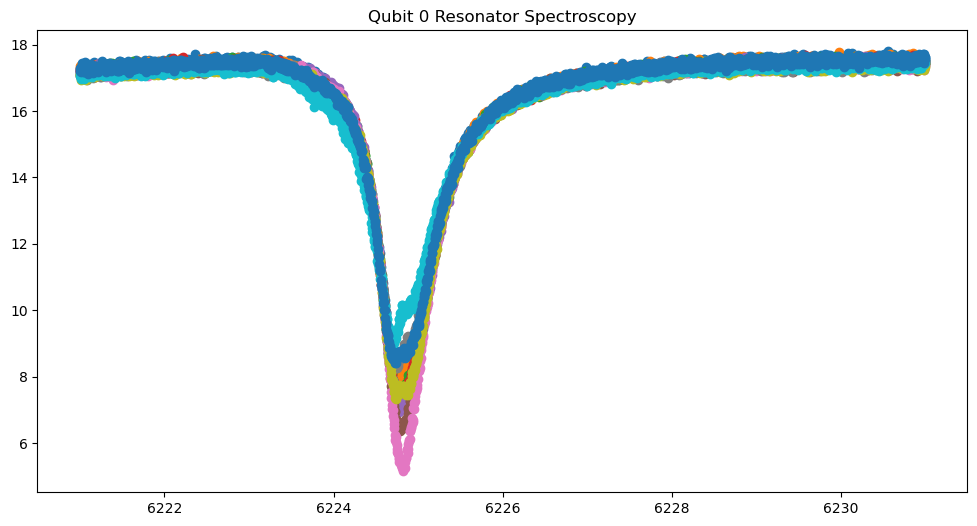

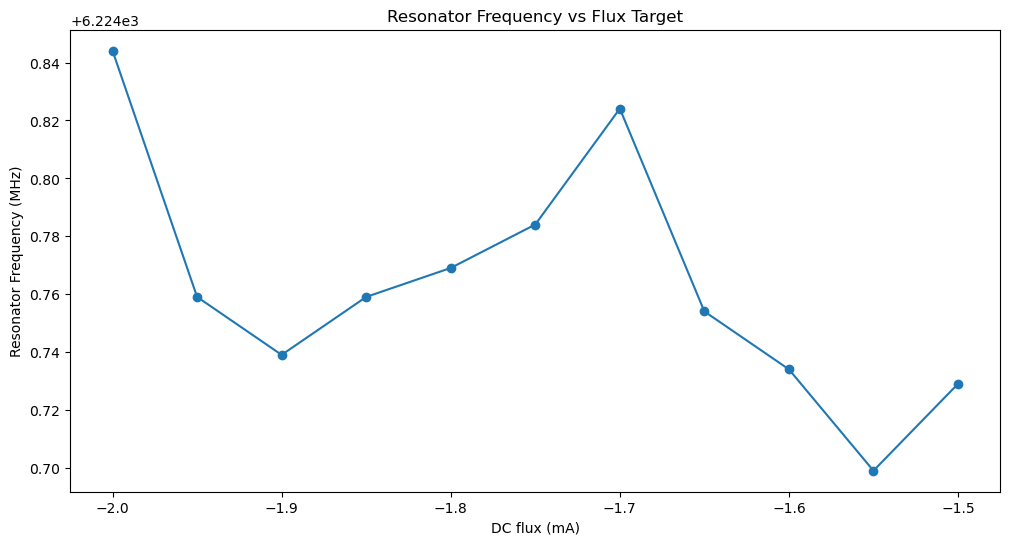

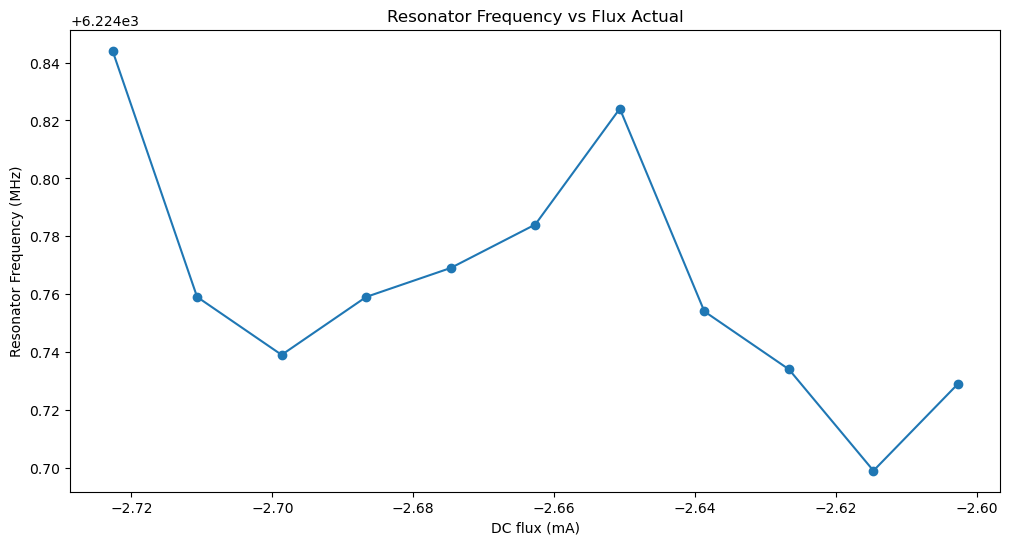

In [252]:
# flux_array = np.arange(0, 5, 0.3)
flux_array = np.arange(-2.0, 2.0, 0.05)[0:11]
num_qubits = 1
data_path = r"M:\malab\_Data\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\20250301 - t1 vs flux - q5/"
data_files = []
qubit_index = [5] # if we care about a specific qubit
for qubit in range(num_qubits):
    day = 1
    offset_index = 0
    data_files.append([])
    for i in range(len(flux_array)):
        try:
            i -= offset_index
            temp_file = data_path + str(f"{i:05d}") + '_res_spec_ge_Q' + str(qubit_index[qubit]) + '_2025-03-0'  + str(day) + '.h5'
            with SlabFile(temp_file, 'r') as f:
                k = 0
            # print(temp_file)
        except:
            offset_index = i
            i -= offset_index
            day+=1
            temp_file = data_path + str(f"{i:05d}") + '_res_spec_ge_Q' + str(qubit_index[qubit]) + '_2025-03-0'  + str(day) + '.h5'
            with SlabFile(temp_file, 'r') as f:
                k = 0

        data_files[qubit].append(temp_file)
print(data_files)
res_freqs = []
actual_dac_vals = []
pt_target = np.array([0.0]*9)

for qubit in range(num_qubits):
    plt.figure(figsize=(12,6))
    for i, data in enumerate(data_files[qubit]):
        pt_target[qubit+1] = flux_array[i]
        pt_target[qubit+2:] = [-5]*7
        pt = np.dot(TRM,pt_target[1:])
        pt = np.insert(pt, 0, pt_target[0])
        with SlabFile(data, 'r') as f:
            freqs = array(f['fpts'])[0]
            amps = array(f['amps'])[0]
            # fit_result = f.attrs['fit_result']
            # fit_result = json.loads(fit_result)
            config = f.attrs['config']
            config = json.loads(config)
            actual_dac_vals.append(pt[qubit_index[qubit]+1])
            res_freqs.append(freqs[np.argmin(amps)])
        plt.plot(freqs, amps, marker='o', label = 'data (flux = ' + str(round(flux_array[i],2)) + 'mA)')
    
    plt.title('Qubit ' + str(qubit) + ' Resonator Spectroscopy')
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plt.figure(figsize=(12,6))
plt.plot(flux_array, res_freqs, marker='o')
plt.xlabel('DC flux (mA)')
plt.ylabel('Resonator Frequency (MHz)')
plt.title('Resonator Frequency vs Flux Target')
plt.show()



plt.figure(figsize=(12,6))
plt.plot(actual_dac_vals, res_freqs, marker='o')
plt.xlabel('DC flux (mA)')
plt.ylabel('Resonator Frequency (MHz)')
plt.title('Resonator Frequency vs Flux Actual')
plt.show()

In [197]:
print(res_freqs)
print(len(res_freqs))

[6148.778823852539, 6148.828811645508, 6148.803817749023, 6148.783822631835, 6148.778823852539, 6148.783822631835, 6148.778823852539, 6148.773825073242, 6148.788821411133, 6148.798818969726, 6148.798818969726, 6148.838809204101, 6148.833810424804, 6148.833810424804, 6148.843807983398, 6148.823812866211, 6148.823812866211, 6148.813815307617, 6148.803817749023, 6148.803817749023, 6148.793820190429, 6148.788821411133, 6148.853805541992, 6148.853805541992, 6148.848806762695, 6148.848806762695, 6148.883798217773, 6148.883798217773, 6148.883798217773, 6148.8937957763665, 6148.918789672851, 6148.908792114257, 6148.9137908935545, 6148.95378112793, 6148.933786010742, 6148.96877746582, 6148.96877746582, 6149.003768920898, 6148.998770141601, 6149.023764038086, 6149.068753051757, 6149.038760375976, 6149.0587554931635, 6149.0937469482415, 6149.073751831054, 6149.123739624023, 6149.133737182617, 6149.133737182617, 6149.158731079101, 6149.163729858398, 6149.193722534179, 6149.213717651367, 6149.25870

## Qubit Frequency vs flux value

[['M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00000_qubit_spec_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00001_qubit_spec_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00002_qubit_spec_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00003_qubit_spec_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00004_qubit_spec_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00005_qubit_spec_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00006_qubit_spec_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 -

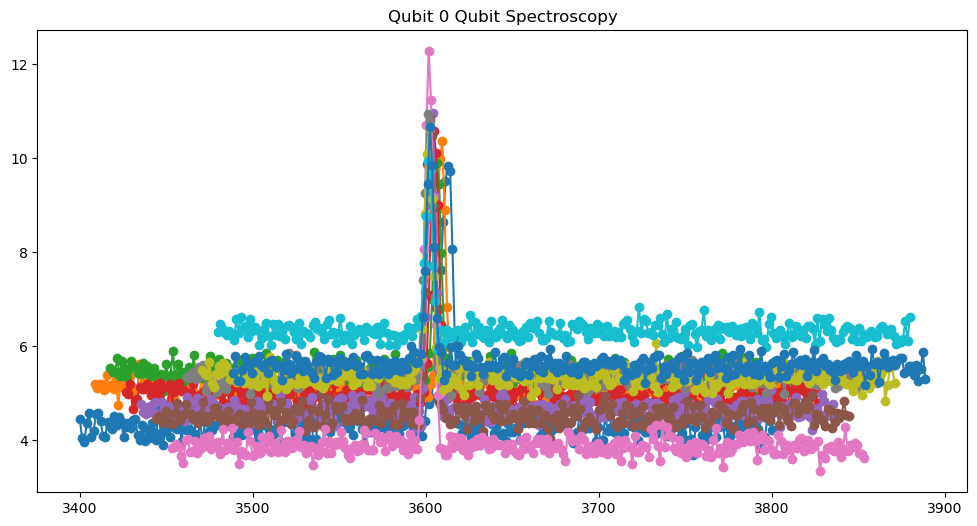

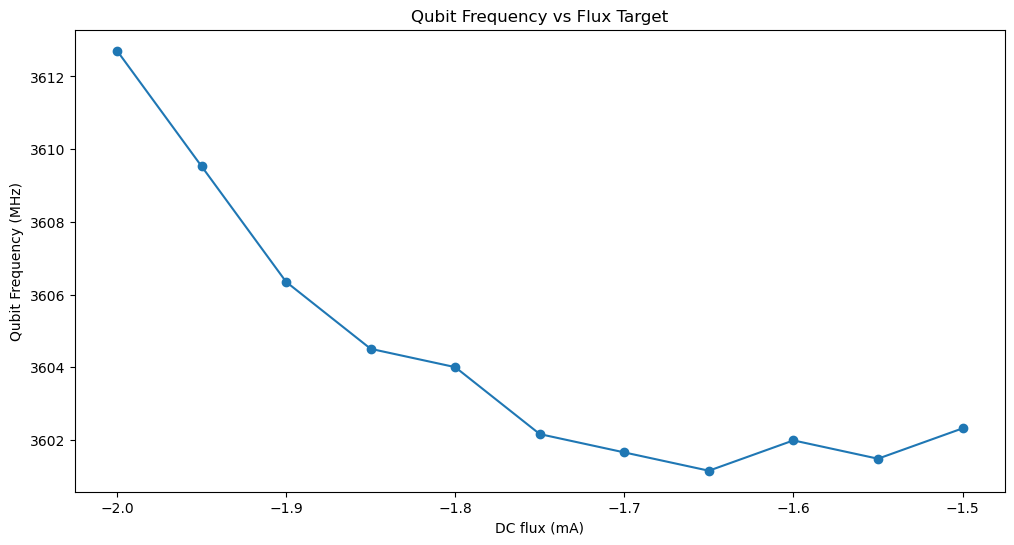

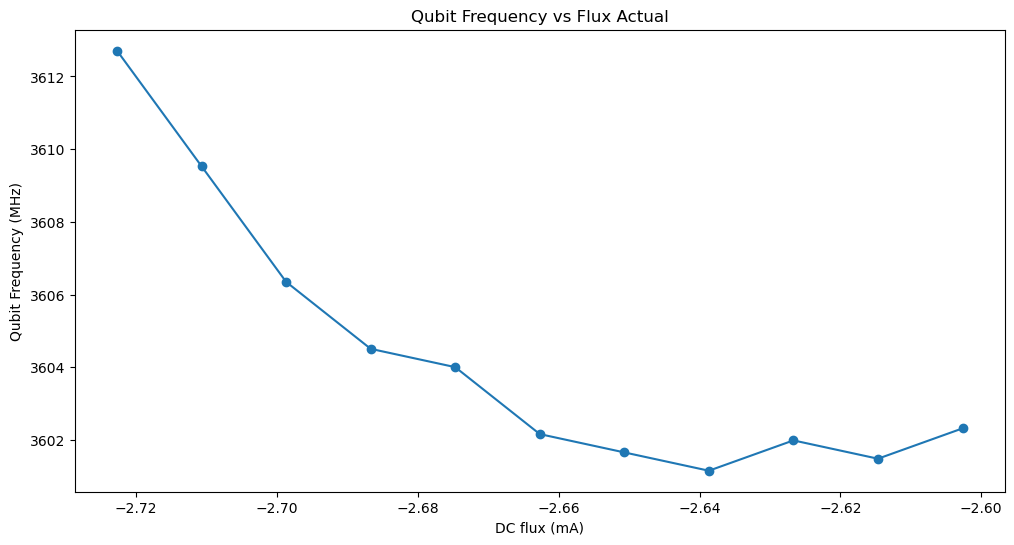

In [253]:
# flux_array = np.arange(0, 5, 0.3)
# flux_array = np.arange(-2.0, 2.0, 0.05)[0:60]
num_qubits = 1
data_path = r"M:\malab\_Data\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\20250301 - t1 vs flux - q5/"
data_files = []
qubit_index = [5] # if we care about a specific qubit
for qubit in range(num_qubits):
    day = 1
    offset_index = 0
    data_files.append([])
    for i in range(len(flux_array)):
        try:
            i -= offset_index
            temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(qubit_index[qubit]) + '_2025-03-0'  + str(day) + '.h5'
            with SlabFile(temp_file, 'r') as f:
                k = 0
            # print(temp_file)
        except:
            offset_index = i
            i -= offset_index
            day+=1
            temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(qubit_index[qubit]) + '_2025-03-0'  + str(day) + '.h5'
            with SlabFile(temp_file, 'r') as f:
                k = 0

        data_files[qubit].append(temp_file)
print(data_files)
qubit_freqs = []
actual_dac_vals = []
pt_target = np.array([0.0]*9)

for qubit in range(num_qubits):
    plt.figure(figsize=(12,6))
    for i, data in enumerate(data_files[qubit]):
        pt_target[qubit+1] = flux_array[i]
        pt_target[qubit+2:] = [-5]*7
        pt = np.dot(TRM,pt_target[1:])
        pt = np.insert(pt, 0, pt_target[0])
        with SlabFile(data, 'r') as f:
            freqs = array(f['fpts'])[0]
            amps = array(f['amps'])[0]
            # fit_result = f.attrs['fit_result']
            # fit_result = json.loads(fit_result)
            config = f.attrs['config']
            config = json.loads(config)
            actual_dac_vals.append(pt[qubit_index[qubit]+1])
            qubit_freqs.append(freqs[np.argmax(amps)])
        plt.plot(freqs, amps, marker='o', label = 'data (flux = ' + str(round(flux_array[i],2)) + 'mA)')
    
    plt.title('Qubit ' + str(qubit) + ' Qubit Spectroscopy')
    # plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plt.figure(figsize=(12,6))
plt.plot(flux_array, qubit_freqs, marker='o')
plt.xlabel('DC flux (mA)')
plt.ylabel('Qubit Frequency (MHz)')
plt.title('Qubit Frequency vs Flux Target')
plt.show()



plt.figure(figsize=(12,6))
plt.plot(actual_dac_vals, qubit_freqs, marker='o')
plt.xlabel('DC flux (mA)')
plt.ylabel('Qubit Frequency (MHz)')
plt.title('Qubit Frequency vs Flux Actual')
plt.show()

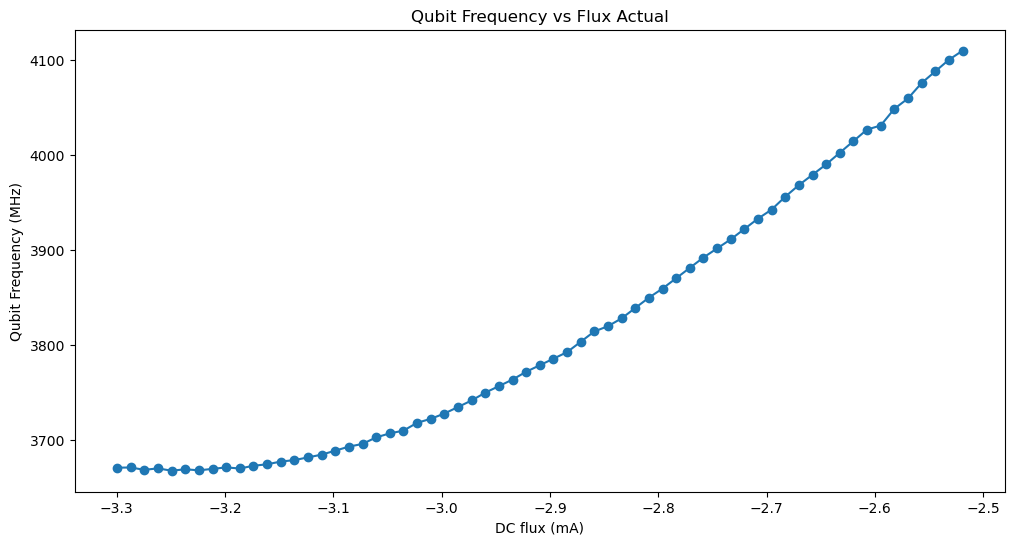

In [199]:
qubit_freqs[32] = qubit_freqs[31] + (qubit_freqs[31] - qubit_freqs[30])
qubit_freqs[33] = qubit_freqs[32] + (qubit_freqs[32] - qubit_freqs[31])
plt.figure(figsize=(12,6))
plt.plot(actual_dac_vals, qubit_freqs, marker='o')
plt.xlabel('DC flux (mA)')
plt.ylabel('Qubit Frequency (MHz)')
plt.title('Qubit Frequency vs Flux Actual')
plt.show()

In [200]:
print(qubit_freqs)
print(len(qubit_freqs))

[3670.733048057556, 3670.934226608276, 3668.4598754882813, 3669.9988300323485, 3667.5244789123535, 3669.0634557723997, 3667.926858329773, 3669.4658351898192, 3671.004789733887, 3669.8682146072383, 3672.7449674606323, 3674.2839220046994, 3677.1606748580934, 3678.6996517181396, 3681.576382255554, 3684.4531351089477, 3688.6676416397095, 3692.88217048645, 3695.7589233398435, 3702.6489818572995, 3706.86351070404, 3709.740241241455, 3717.968098068237, 3722.182626914978, 3727.7349094390866, 3734.6249902725217, 3741.5150487899778, 3749.7429056167603, 3756.632986450195, 3763.5230449676515, 3771.7509017944335, 3778.6409603118896, 3785.5310188293456, 3792.4210773468017, 3803.324508476257, 3814.227917289734, 3819.7802221298216, 3828.0080566406245, 3838.9114654541013, 3849.8148519515985, 3859.3804847717283, 3870.2838935852046, 3881.1872800827023, 3892.090688896179, 3901.6562994003293, 3911.2219322204587, 3922.1253410339355, 3933.0287275314327, 3942.5943603515625, 3956.173298835754, 3968.41448364257

In [157]:
print(actual_dac_vals)

[-3.2998229199999995, -3.2746356689999994, -3.249448417999999, -3.224261167, -3.1990739159999997, -3.1738866649999995, -3.1486994139999993, -3.123512162999999]


[['M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00000_power_rabi_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00001_power_rabi_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00002_power_rabi_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00003_power_rabi_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00004_power_rabi_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00005_power_rabi_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00006_power_rabi_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 -

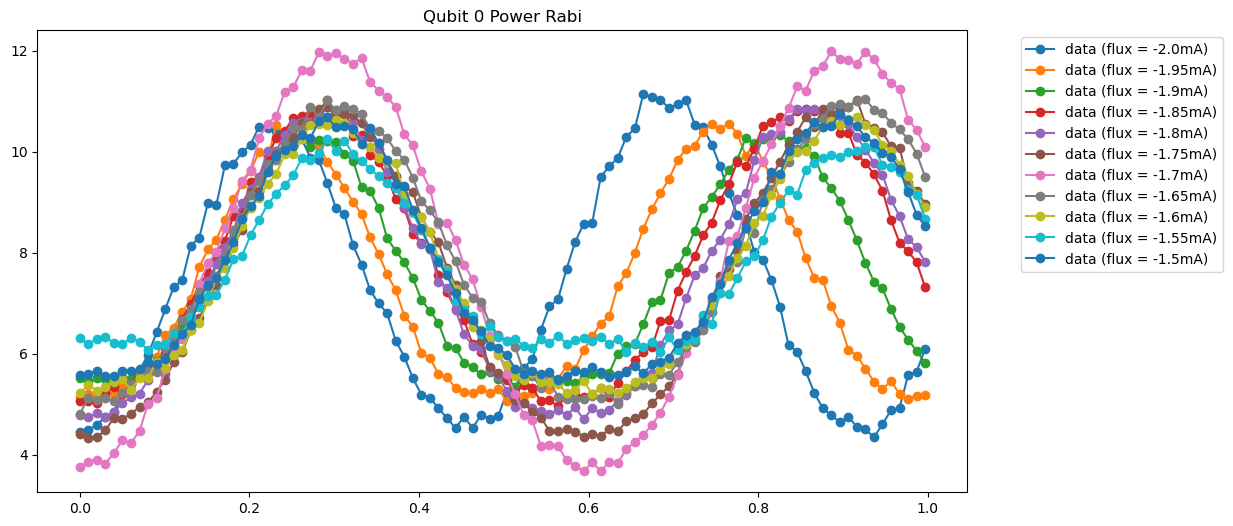

[0.23001931301490464, 0.24925068194711433, 0.2681315697070425, 0.2823681729140373, 0.28751473385401594, 0.2983991950918619, 0.30223556531512513, 0.3049142210068143, 0.27721564246001856, 0.3, 0.28152988684005764]


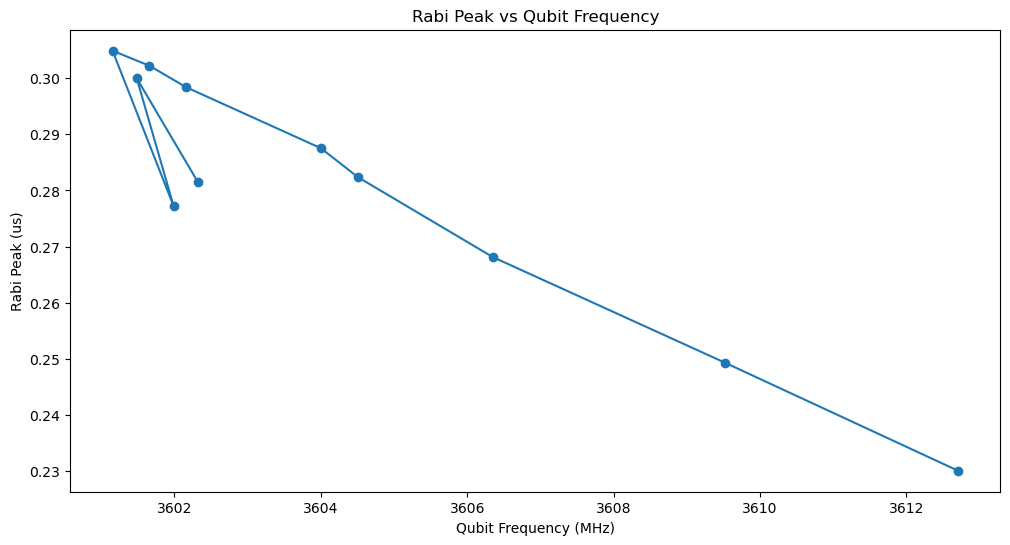

In [254]:
# flux_array = np.arange(0, 5, 0.2)
# flux_array = np.arange(-1, 5, 0.1)[0:5]
num_qubits = 1
data_path = r"M:\malab\_Data\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\20250301 - t1 vs flux - q5/"
data_files = []
for qubit in range(num_qubits):
    day = 1
    offset_index = 0
    data_files.append([])
    for i in range(len(flux_array)):
        try:
            i -= offset_index
            temp_file = data_path + str(f"{i:05d}") + '_power_rabi_ge_Q' + str(qubit_index[qubit]) + '_2025-03-0'  + str(day) + '.h5'
            with SlabFile(temp_file, 'r') as f:
                k = 0
            # print(temp_file)
        except:
            offset_index = i
            i -= offset_index
            day+=1
            temp_file = data_path + str(f"{i:05d}") + '_power_rabi_ge_Q' + str(qubit_index[qubit]) + '_2025-03-0'  + str(day) + '.h5'
            with SlabFile(temp_file, 'r') as f:
                k = 0
        
        data_files[qubit].append(temp_file)
print(data_files)
res_freq = []
freq_data_list = []
amp_data_list = []
peak_list = []
for qubit in range(num_qubits):
    freq_data_list.append([])
    amp_data_list.append([])
    plt.figure(figsize=(12,6))
    for i, data in enumerate(data_files[qubit]):
        with SlabFile(data, 'r') as f:
            gains = array(f['gains'])[0]
            I = array(f['avgi'])[0]
            Q = array(f['avgq'])[0]
            amps = array(f['amps'])[0]
            # fit_result = f.attrs['fit_result']
            # fit_result = json.loads(fit_result)
            config = f.attrs['config']
            config = json.loads(config)
            # freq_data_list[qubit].append(freqs)
            # amp_data_list[qubit].append(amps)
        
        plt.plot(gains, amps, marker='o', label = 'data (flux = ' + str(round(flux_array[i],2)) + 'mA)')

        fit = Fit()
        # Choose the suitable fitting function - currently bug for rabi - fixed in analysis
        fit_result = fit.rabi(gains, amps)

        fit_result = {
                "f": fit_result['f'],
                "phase": fit_result['phase'],
                "T": fit_result['T'],
                "amp": fit_result['amp'],
                "offset": fit_result['offset']
            }
        
        f = fit_result['f'][0]
        phi = fit_result['phase'][0]
        T = fit_result['T'][0]
        a = fit_result['amp'][0]
        offset = fit_result['offset'][0]
        y_fit = a * (np.sin(0.5 * (2 * np.pi * f) * gains + phi))**2 * np.exp(-gains / T) + offset
        fit_std = (amps - y_fit).std()

        if fit_std < 0.2:
            peak = 0.5 / fit_result['f'][0]# - (fit_result['phase'][0]/(180*fit_result['f'][0]))
        else:
            print('Fit not good, std = ', fit_std)
            fit_result = fitdecaysin(gains, amps)
            peak = 0.5 / fit_result[1]
        
        if peak > 1.0:
            peak = 1.0
        elif peak < 0.2:
            peak = 0.3
        
        peak_list.append(peak)

    plt.title('Qubit ' + str(qubit) + ' Power Rabi')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    
print(peak_list)
plt.figure(figsize=(12,6))
plt.plot(qubit_freqs, peak_list, marker='o')
plt.xlabel('Qubit Frequency (MHz)')
plt.ylabel('Rabi Peak (us)')
plt.title('Rabi Peak vs Qubit Frequency')
plt.show()

[['M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00000_T1_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00001_T1_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00002_T1_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00003_T1_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00004_T1_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00005_T1_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00006_T1_ge_Q5_2025-03-02.h5', 'M:\\malab\\_Data\\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250301 - t1 vs flux - q5/00007_T1_ge_Q

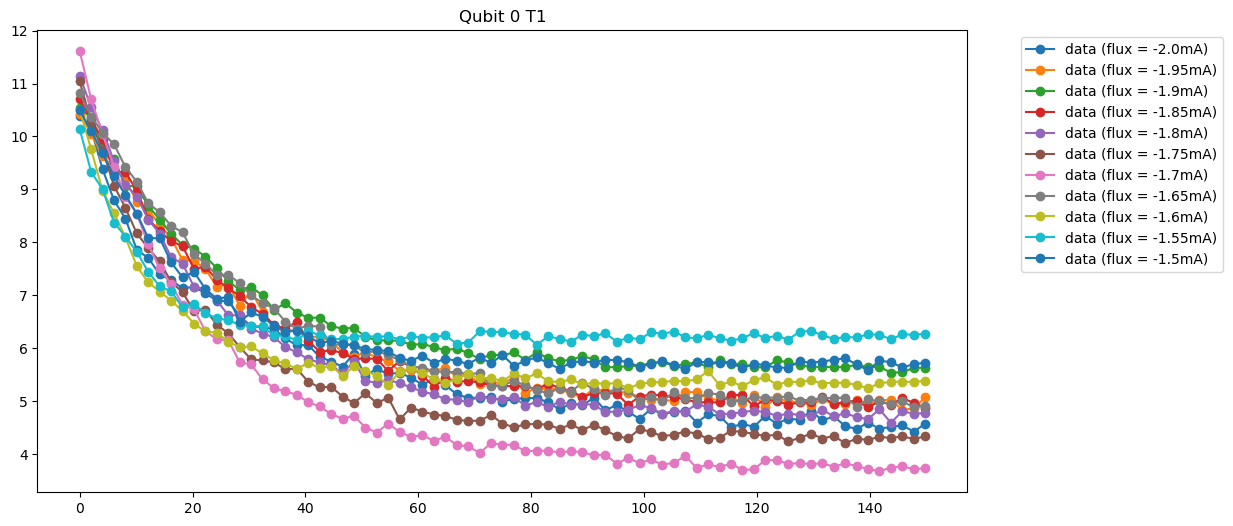

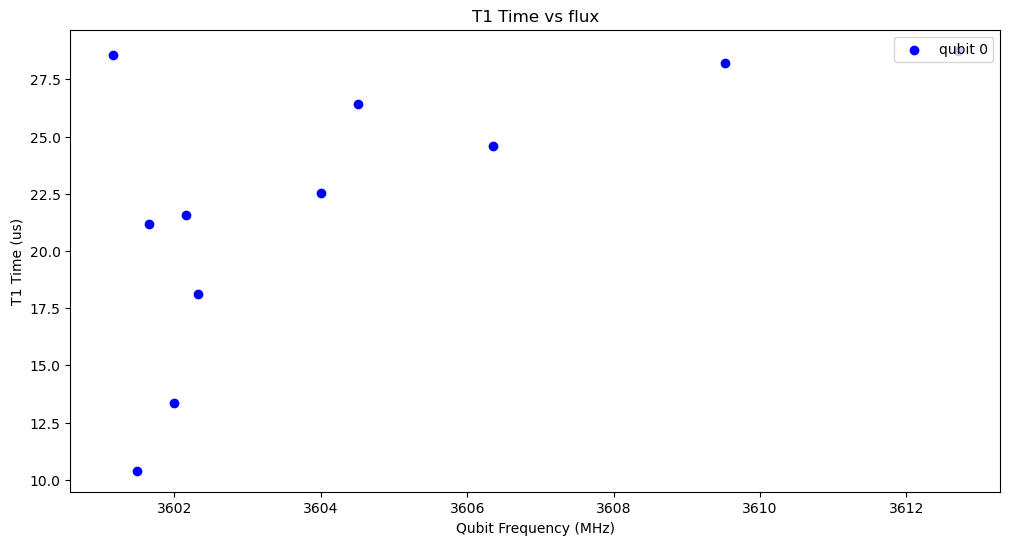

Qubit 0: 22.15 us +/- 5.87 us


In [255]:
# flux_array = np.arange(0, 5, 0.2)
# flux_array = np.arange(-2, 2, 0.05)[0:62]
num_qubits = 1
data_path = r"M:\malab\_Data\20250210 - Santi - RFSoC tprocv2 - LL8qubit meas\20250301 - t1 vs flux - q5/"
data_files = []
for qubit in range(num_qubits):
    day = 1
    offset_index = 0
    data_files.append([])
    for i in range(len(flux_array)):
        try:
            i -= offset_index
            temp_file = data_path + str(f"{i:05d}") + '_T1_ge_Q' + str(qubit_index[qubit]) + '_2025-03-0'  + str(day) + '.h5'
            with SlabFile(temp_file, 'r') as f:
                k = 0
            # print(temp_file)
        except:
            offset_index = i
            i -= offset_index
            day+=1
            temp_file = data_path + str(f"{i:05d}") + '_T1_ge_Q' + str(qubit_index[qubit]) + '_2025-03-0'  + str(day) + '.h5'
            with SlabFile(temp_file, 'r') as f:
                k = 0
        
        data_files[qubit].append(temp_file)

print(data_files)
t1_times = []

for qubit in range(num_qubits):
    t1_times.append([])
    plt.figure(figsize=(12,6))
    plt.title('Qubit ' + str(qubit) + ' T1')
    for i, data in enumerate(data_files[qubit]):
        with SlabFile(data, 'r') as f:
            delay_times = array(f['delay_times'])[0]
            I = array(f['avgi'])[0]
            Q = array(f['avgq'])[0]
            amps = array(f['amps'])[0]
            # fit_result = f.attrs['fit_result']
            # fit_result = json.loads(fit_result)
            config = f.attrs['config']
            config = json.loads(config)
            # freq_data_list[qubit].append(freqs)
            # amp_data_list[qubit].append(amps)

        plt.plot(delay_times, amps, marker='o', label = 'data (flux = ' + str(round(flux_array[i],2)) + 'mA)')
    
        fit = Fit()
        fit_results = fit.T1(delay_times, amps, plot=False)
        # pp.pprint(fit_results)
        t1_times[qubit].append(fit_results['T1'][0])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(12,6))
for qubit in range(num_qubits):
    # if qubit !=4 and qubit != 2:
    plt.scatter(qubit_freqs[0:62], t1_times[qubit], marker='o', color = colors[qubit], label='qubit ' + str(qubit))
plt.xlabel('Qubit Frequency (MHz)')
plt.ylabel('T1 Time (us)')
plt.title('T1 Time vs flux')
plt.legend(loc = 'upper right')
# plt.ylim(0,40)
plt.show()
# finding the average T1 time and the standard deviation for each qubit
t1_avg = []
t1_std = []
for qubit in range(num_qubits):
    t1_avg.append(np.mean(t1_times[qubit]))
    t1_std.append(np.std(t1_times[qubit]))
    print('Qubit %d: %.2f us' %(qubit, t1_avg[qubit]) + ' +/- %.2f us' %t1_std[qubit])

In [212]:
print(len(data_files[0]))

40


[['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_qubit_spec_ge_mux_Q0_2025-03-25.h5'], ['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_qubit_spec_ge_mux_Q1_2025-03-25.h5'], ['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_qubit_spec_ge_mux_Q5_2025-03-25.h5'], ['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_qubit_spec_ge_mux_Q6_2025-03-25.h5'], ['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_qubit_spec_ge_mux_Q7_2025-03-25.h5']]


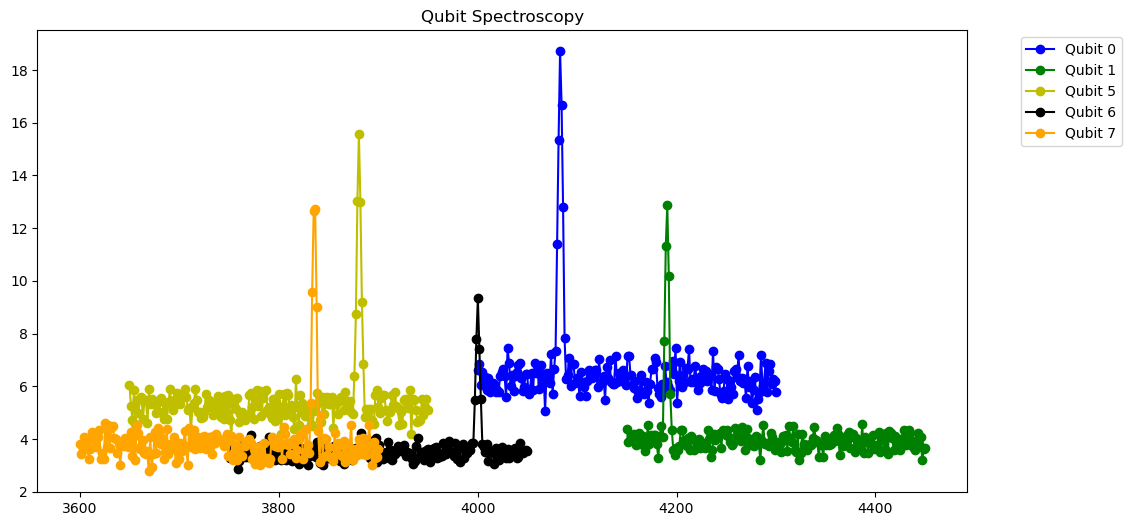

[4082.914357566833, 4190.703414916992, 3880.652656173706, 4000.2505931854243, 3836.6827909469603]


In [16]:
num_qubits = 5
MUX = True
data_path = global_data_path
data_files = []
qubit_index = [0,1,5,6,7] # if we care about a specific qubit
for qubit in range(num_qubits):
    day = 25
    offset_index = 0
    data_files.append([])
    # for i in range(len(flux_array)):
    i = 0
    try:
        i -= offset_index
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_mux_Q' + str(qubit_index[qubit]) + '_2025-03-'  + str(day) + '.h5'
        with SlabFile(temp_file, 'r') as f:
            # print(temp_file)
            k = 0
        # print(temp_file)
    except:
        offset_index = i
        i -= offset_index
        day+=1
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_mux_Q' + str(qubit_index[qubit]) + '_2025-03-'  + str(day) + '.h5'
        with SlabFile(temp_file, 'r') as f:
            k = 0

    data_files[qubit].append(temp_file)
print(data_files)
qubit_freqs = []
actual_dac_vals = []
# pt_target = np.array([0.0]*9)

plt.figure(figsize=(12,6))
for q, qubit in enumerate(qubit_index):
    for i, data in enumerate(data_files[q]):
        # pt_target[qubit+1] = flux_array[i]
        # pt_target[qubit+2:] = [-5]*7
        # pt = np.dot(TRM,pt_target[1:])
        # pt = np.insert(pt, 0, pt_target[0])
        with SlabFile(data, 'r') as f:
            freqs = array(f['fpts'])[0]
            amps = array(f['amps'])[0]
            # fit_result = f.attrs['fit_result']
            # fit_result = json.loads(fit_result)
            config = f.attrs['config']
            config = json.loads(config)
            # actual_dac_vals.append(pt[qubit_index[qubit]+1])
            qubit_freqs.append(freqs[np.argmax(amps)])
        
        if MUX:
            amps = amps.T[0]
        plt.plot(freqs, amps, marker='o', label = 'Qubit ' + str(qubit), color = colors[qubit])

    plt.title('Qubit Spectroscopy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print(qubit_freqs)
# plt.figure(figsize=(12,6))
# # plt.plot(flux_array, qubit_freqs, marker='o')
# plt.xlabel('DC flux (mA)')
# plt.ylabel('Qubit Frequency (MHz)')
# plt.title('Qubit Frequency vs Flux Target')
# plt.show()



# plt.figure(figsize=(12,6))
# plt.plot(actual_dac_vals, qubit_freqs, marker='o')
# plt.xlabel('DC flux (mA)')
# plt.ylabel('Qubit Frequency (MHz)')
# plt.title('Qubit Frequency vs Flux Actual')
# plt.show()

[['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_T1_ge_mux_Q0_2025-03-25.h5'], ['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_T1_ge_mux_Q1_2025-03-25.h5'], ['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_T1_ge_mux_Q5_2025-03-25.h5'], ['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_T1_ge_mux_Q6_2025-03-25.h5'], ['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_T1_ge_mux_Q7_2025-03-25.h5']]


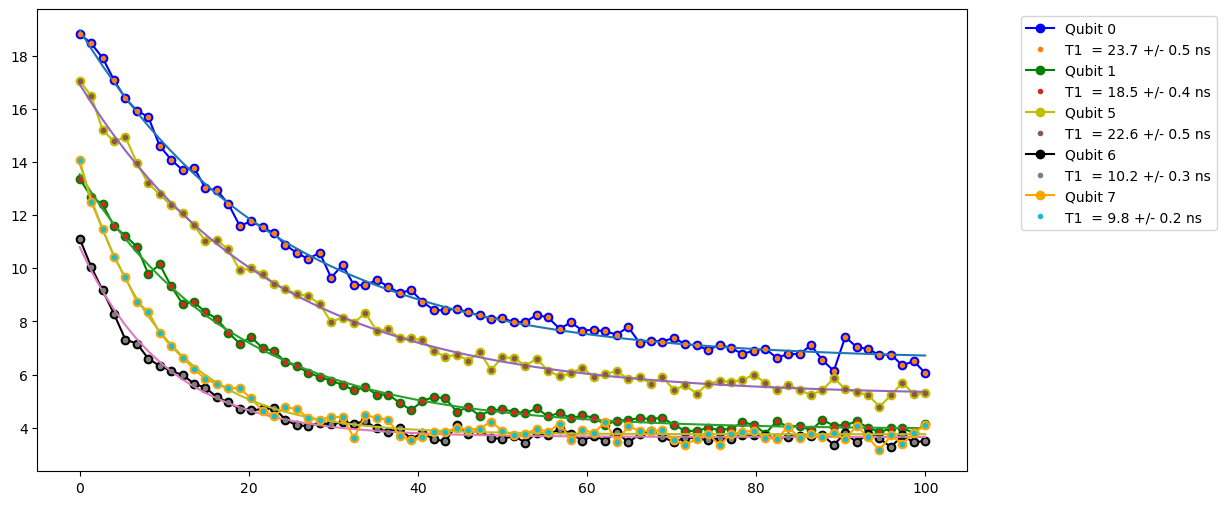

[23.688408675332465, 18.494822910965866, 22.55568740243233, 10.183793867412788, 9.756866443135223]


In [23]:
MUX = True
num_qubits = 5
data_path = global_data_path
data_files = []
qubit_index = [0,1,5,6,7] # if we care about a specific qubit
for qubit in range(num_qubits):
    day = 25
    offset_index = 0
    data_files.append([])
    # for i in range(len(flux_array)):
    i = 0
    try:
        i -= offset_index
        temp_file = data_path + str(f"{i:05d}") + '_T1_ge_mux_Q' + str(qubit_index[qubit]) + '_2025-03-'  + str(day) + '.h5'
        with SlabFile(temp_file, 'r') as f:
            # print(temp_file)
            k = 0
        # print(temp_file)
    except:
        offset_index = i
        i -= offset_index
        day+=1
        temp_file = data_path + str(f"{i:05d}") + '_T1_ge_Q' + str(qubit_index[qubit]) + '_2025-03-'  + str(day) + '.h5'
        with SlabFile(temp_file, 'r') as f:
            k = 0

    data_files[qubit].append(temp_file)
print(data_files)
# qubit_freqs = []
# actual_dac_vals = []        
t1_times = []
plt.figure(figsize=(12,6))
for q, qubit in enumerate(qubit_index):
    for i, data in enumerate(data_files[q]):
        with SlabFile(data, 'r') as f:
            delay_times = array(f['delay_times'])[0]
            I = array(f['avgi'])[0]
            Q = array(f['avgq'])[0]
            amps = array(f['amps'])[0]
            # fit_result = f.attrs['fit_result']
            # fit_result = json.loads(fit_result)
            config = f.attrs['config']
            config = json.loads(config)
            # freq_data_list[qubit].append(freqs)
            # amp_data_list[qubit].append(amps)

        plt.plot(delay_times, amps, marker='o', label = 'Qubit ' + str(qubit), color = colors[qubit])
        if MUX:
            amps = amps.T[0]
        fit = Fit()
        fit_results = fit.T1(delay_times, amps, plot=True)
        # pp.pprint(fit_results)
        t1_times.append(fit_results['T1'][0])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
print(t1_times)

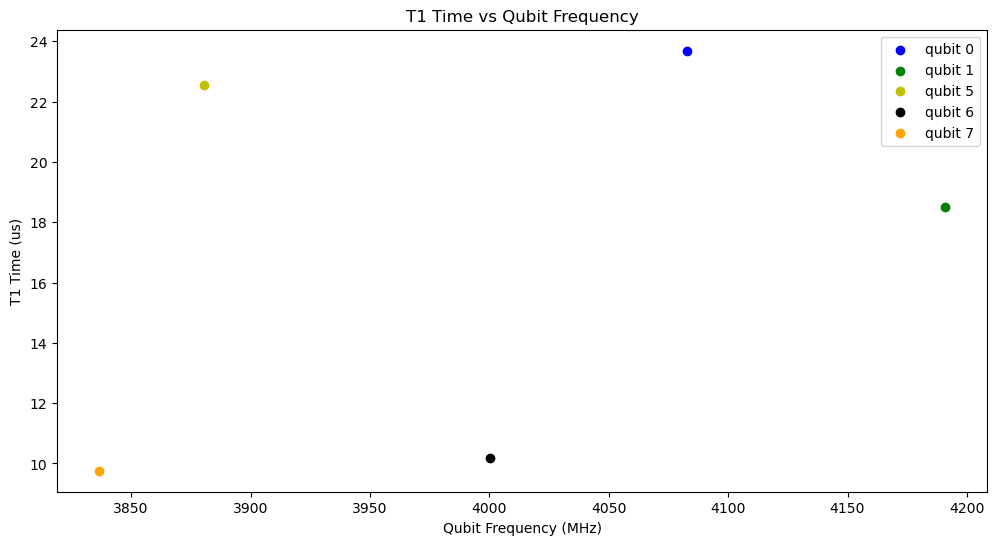

In [18]:
# plotting t1 times vs qubit frequency
plt.figure(figsize=(12,6))
for q, qubit in enumerate(qubit_index):
    plt.scatter(qubit_freqs[q], t1_times[q], marker='o', color = colors[qubit], label='qubit ' + str(qubit))
plt.xlabel('Qubit Frequency (MHz)')
plt.ylabel('T1 Time (us)')
plt.title('T1 Time vs Qubit Frequency')
plt.legend(loc = 'upper right')


[['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_Ramsey_ge_mux_Q0_2025-03-25.h5'], ['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_Ramsey_ge_mux_Q1_2025-03-25.h5'], ['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_Ramsey_ge_mux_Q5_2025-03-25.h5'], ['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_Ramsey_ge_mux_Q6_2025-03-25.h5'], ['M:\\malab\\_Data\\20250324 - Santi - RFSoC tprocv2 - LL8qubit meas\\20250324 - initial characterization/00000_Ramsey_ge_mux_Q7_2025-03-25.h5']]


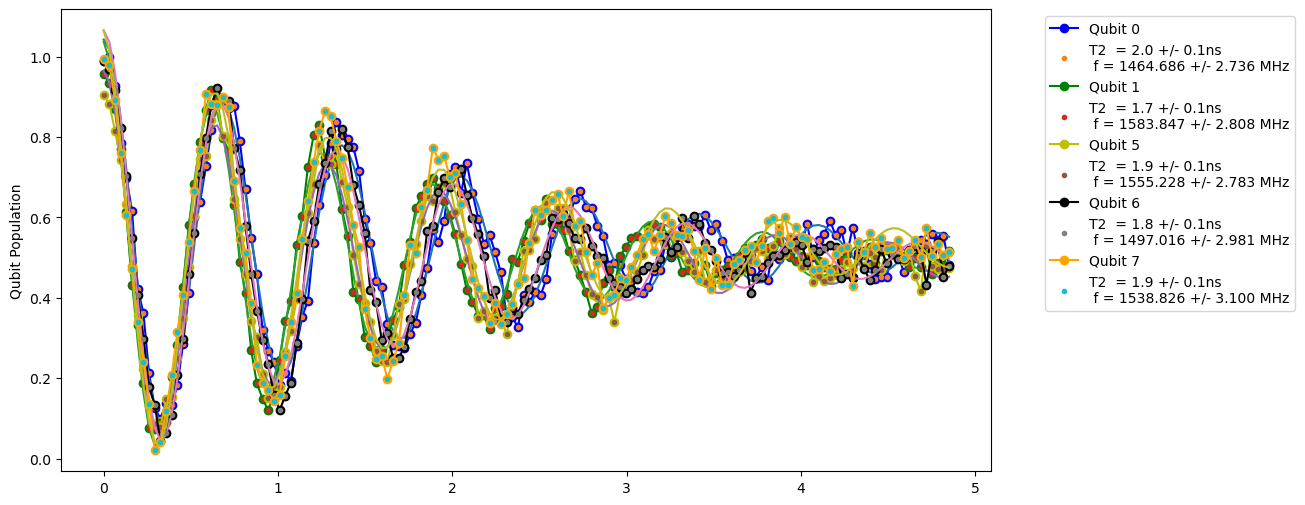

[1.9851691769997462, 1.7281967538902554, 1.9298094055131148, 1.8114643635855032, 1.9315490949917962]


In [27]:
MUX = True
SS = 'True'
num_qubits = 5
data_path = global_data_path
data_files = []
qubit_index = [0,1,5,6,7] # if we care about a specific qubit
for qubit in range(num_qubits):
    day = 25
    offset_index = 0
    data_files.append([])
    # for i in range(len(flux_array)):
    i = 0
    try:
        i -= offset_index
        temp_file = data_path + str(f"{i:05d}") + '_Ramsey_ge_mux_Q' + str(qubit_index[qubit]) + '_2025-03-'  + str(day) + '.h5'
        with SlabFile(temp_file, 'r') as f:
            # print(temp_file)
            k = 0
        # print(temp_file)
    except:
        offset_index = i
        i -= offset_index
        day+=1
        temp_file = data_path + str(f"{i:05d}") + '_Ramsey_ge_Q' + str(qubit_index[qubit]) + '_2025-03-'  + str(day) + '.h5'
        with SlabFile(temp_file, 'r') as f:
            k = 0

    data_files[qubit].append(temp_file)
print(data_files)
# qubit_freqs = []
# actual_dac_vals = []        
t2_times = []
plt.figure(figsize=(12,6))
for q, qubit in enumerate(qubit_index):
    for i, data in enumerate(data_files[q]):
        with SlabFile(data, 'r') as f:
            delay_times = array(f['delay_times'])[0]
            I = array(f['avgi'])[0]
            Q = array(f['avgq'])[0]
            amps = array(f['amps'])[0]
            # fit_result = f.attrs['fit_result']
            # fit_result = json.loads(fit_result)
            config = f.attrs['config']
            config = json.loads(config)
            # freq_data_list[qubit].append(freqs)
            # amp_data_list[qubit].append(amps)
            if SS == 'True':
                Ig = array(f['I_g'])[0]
                Qg = array(f['Q_g'])[0]
                Ie = array(f['I_e'])[0]
                Qe = array(f['Q_e'])[0]

        if SS == 'True':
            # Normalize data
            e = np.mean((Ie+1j*Qe))
            g = np.mean((Ig+1j*Qg))
            ### Normalization ###
            pop_norm = abs(((I+1j*Q) - g)*(e- g) / abs(e - g)**2)
            ydata = pop_norm
        else:
            ydata = amps

        plt.plot(delay_times, ydata, marker='o', label = 'Qubit ' + str(qubit), color = colors[qubit])
        if MUX:
            ydata = ydata.T[0]
        fit = Fit()
        fit_results = fit.ramsey(delay_times, ydata, plot=True)
        # pp.pprint(fit_results)
        t2_times.append(fit_results['T2'][0])

if SS == 'True':
    plt.ylabel("Qubit Population")
else:
    plt.ylabel("a.u.")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
print(t2_times)

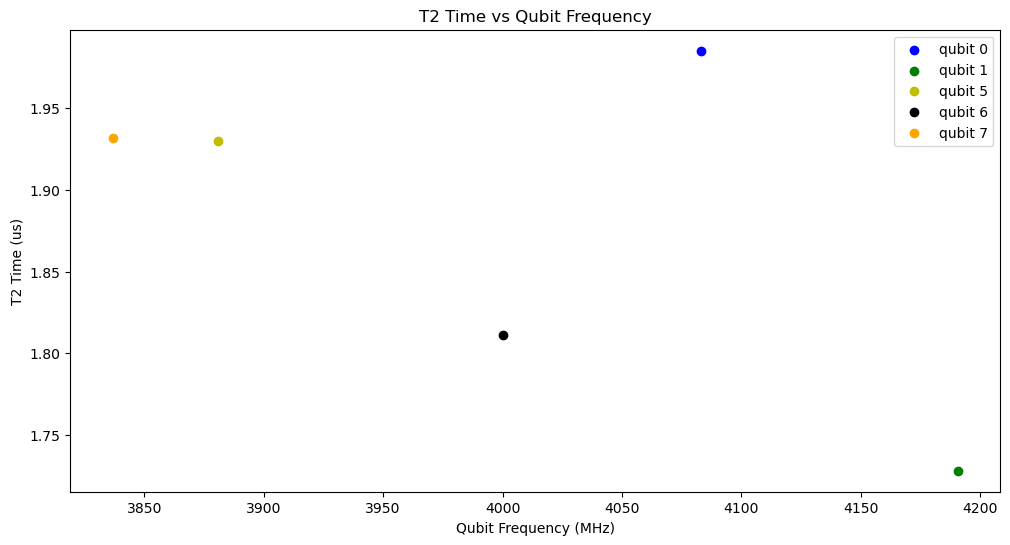

In [28]:
# plotting t2 times vs qubit frequency
plt.figure(figsize=(12,6))
for q, qubit in enumerate(qubit_index):
    plt.scatter(qubit_freqs[q], t2_times[q], marker='o', color = colors[qubit], label='qubit ' + str(qubit))
plt.xlabel('Qubit Frequency (MHz)')
plt.ylabel('T2 Time (us)')
plt.title('T2 Time vs Qubit Frequency')
plt.legend(loc = 'upper right')


# T1 vs Freq

In [361]:
global_data_path = r"M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250421 - Santi - RFSoC tprocv2 - char3900"
expt_path = r"\q7 - t1_scan"
global_data_path = global_data_path + expt_path

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']

### Get qubit specs (if needed)

In [359]:
flux_array = np.linspace(-0.3, 0.3, 100) # in unit of mA

Text(0.5, 0, 'Flux (mA)')

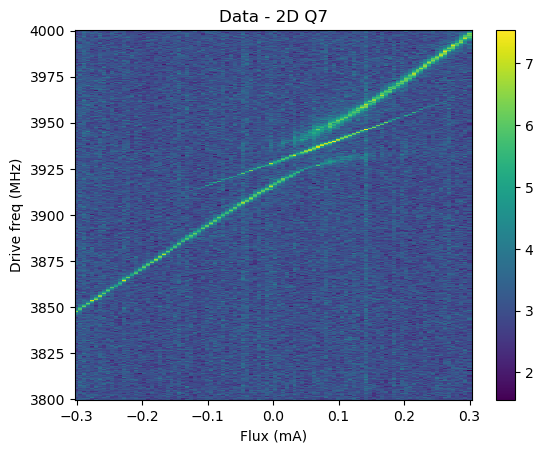

In [ ]:
q1_flux = np.array(flux_array)

data_path = global_data_path + "\\"
data_files0 = []
q1 = 7
date1 = '2025-04-21'
date2 = '2025-04-22'
index_shift = 0
for i in range(100):
    try:
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(q1) + '_' + date1 + '.h5'
        with SlabFile(temp_file, 'r') as f:
            data_files0.append(temp_file)
    except:
        i-=index_shift
        temp_file = data_path + str(f"{i:05d}") + '_qubit_spec_ge_Q' + str(q1) + '_' + date2 + '.h5'
        # print(temp_file)
        data_files0.append(temp_file)

qubit7_freqs = []

for i, data in enumerate(data_files0):
    with SlabFile(data, 'r') as f:
        freqs = array(f['fpts'])[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)

    qubit7_freqs.append(freqs[np.argmax(amps)])

# plt.figure(figsize=(12,6))
# plt.plot(qubit7_freqs, marker='o')
# plt.xlabel('DC flux (mA)')
# plt.ylabel('Qubit Frequency (MHz)')
# plt.title('Qubit Frequency vs Flux Target')
# plt.show()

qubit0_freqs = []
freq_pts0 = []
amp_pts0 = []

for i, data in enumerate(data_files0):
    with SlabFile(data, 'r') as f:
        freqs = array(f['fpts'])[0]
        I = array(f['avgi'])[0]
        Q = array(f['avgq'])[0]
        amps = array(f['amps'])[0]
        # fit_result = f.attrs['fit_result']
        # fit_result = json.loads(fit_result)
        config = f.attrs['config']
        config = json.loads(config)
    freq_pts0.append(freqs)
    amp_pts0.append(amps)

freq_pts0 = np.array(freq_pts0)
amp_pts0 = np.array(amp_pts0)

plt.pcolor(q1_flux, freq_pts0.T, amp_pts0.T, cmap = cmap)
plt.colorbar()
plt.title('Data - 2D Q' + str(q1))
plt.ylabel('Drive freq (MHz)')
plt.xlabel('Flux (mA)')

In [363]:
flux_array = np.linspace(0.3, 0.8, 50) # in unit of mA
q1_flux = np.array(flux_array)
print(len(q1_flux))

50


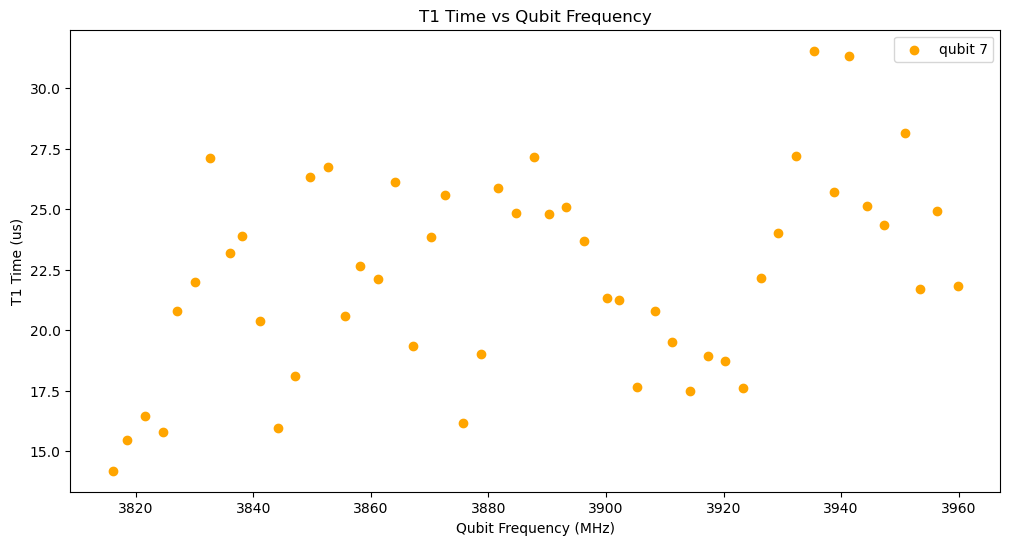

In [364]:
global_data_path = r"M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250421 - Santi - RFSoC tprocv2 - char3900"
# data_path = global_data_path + "\\"
# data_paths = [r"\q1 - t1_scan", r"\q2 - t1_scan", r"\q3 - t1_scan",  r"\q4 - t1_scan", r"\q5 - t1_scan", r"\q6 - t1_scan"]#, r"\q7 - t1_scan"]
data_paths = [r"\q7 - t1_scan"]
qubit_index = 7
# plot t1 times vs qubit frequency
all_qubit_freqs = []
plt.figure(figsize=(12,6))
for i, expt_path in enumerate(data_paths):
    all_qubit_freqs.append([])
    qubit_index = i+7
    data_path = global_data_path + expt_path
    lookup_file = 'lookup_file'
    with SlabFile(data_path + '\\' + lookup_file, 'r') as f:
        # 'a': read/write/create

        # - Adds data to the file - #
        res_freqs = array(f['res0_freqs'])[0]
        qubit_freqs = array(f['qubit0_freqs'])[0]
        t1_array = array(f['t1_array'])[0]


    all_qubit_freqs[i] = qubit_freqs
    # get only even indices of t1_array
    t1_array = t1_array[0:len(t1_array):2]
    plt.scatter(qubit_freqs, t1_array, marker='o', color = colors[qubit_index], label='qubit ' + str(qubit_index))
plt.xlabel('Qubit Frequency (MHz)')
plt.ylabel('T1 Time (us)')
plt.title('T1 Time vs Qubit Frequency')
plt.legend(loc = 'upper right')
plt.show()


M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250421 - Santi - RFSoC tprocv2 - char3900\q7 - t1_scan\00000_T1_ge_Q7_2025-04-22.h5
M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250421 - Santi - RFSoC tprocv2 - char3900\q7 - t1_scan\00001_T1_ge_Q7_2025-04-22.h5
M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250421 - Santi - RFSoC tprocv2 - char3900\q7 - t1_scan\00002_T1_ge_Q7_2025-04-22.h5
M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250421 - Santi - RFSoC tprocv2 - char3900\q7 - t1_scan\00003_T1_ge_Q7_2025-04-22.h5
M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250421 - Santi - RFSoC tprocv2 - char3900\q7 - t1_scan\00004_T1_ge_Q7_2025-04-22.h5
M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250421 - Santi - RFSoC tprocv2 - char3900\q7 - t1_scan\00005_T1_ge_Q7_2025-04-22.h5
M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250421 - Santi - RFSoC tprocv2 - char3900\q7 - t1_scan\00006_T1_ge_Q7_2025-04-22.h5
M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250421 - Santi - RFSoC tprocv2 - char3900\q7

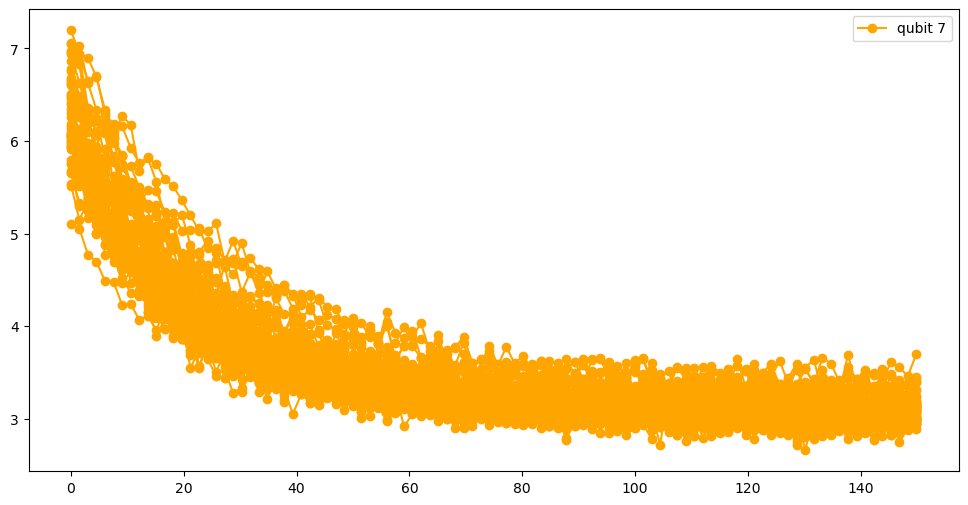

Qubit 7: 22.30 us +/- 4.06 us


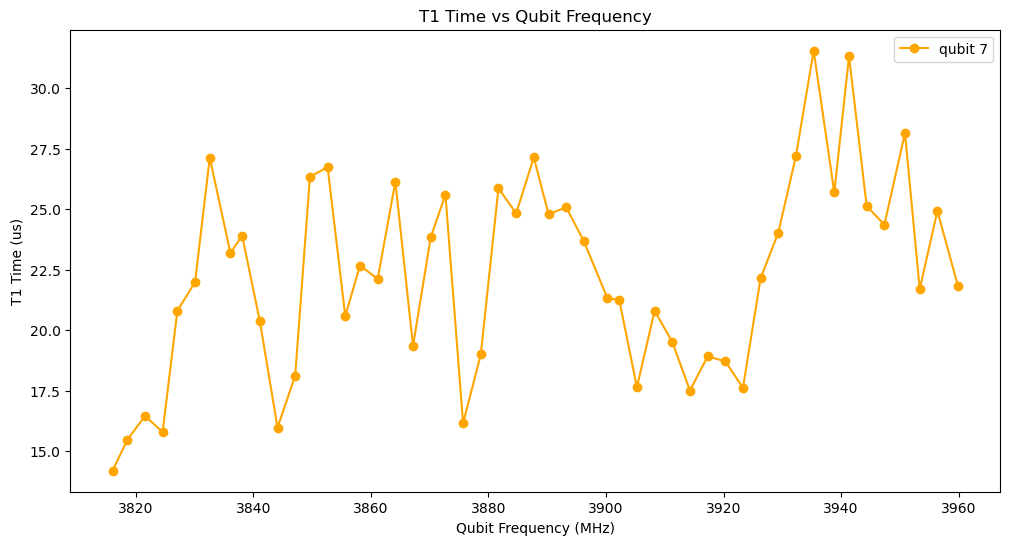

In [366]:
global_data_path = r"M:\malab\_Data\PUR1D4\20250410 - cooldown 6\20250421 - Santi - RFSoC tprocv2 - char3900"
# data_path = global_data_path + "\\"
# data_paths = [r"\q1 - t1_scan", r"\q2 - t1_scan", r"\q3 - t1_scan",  r"\q4 - t1_scan", r"\q5 - t1_scan", r"\q6 - t1_scan", r"\q7 - t1_scan"]
data_files = []
# date_list = ['_2025-04-17', '_2025-04-18', '_2025-04-19', '_2025-04-20','_2025-04-21' ]
date_list = [ '_2025-04-21','_2025-04-22' ]

num_pts = 50
num_qubits = 1
q_start_index = 7
for qubit in range(num_qubits):
    date_index = 0
    offset_index = 0
    data_files.append([])
    data_path = global_data_path + data_paths[qubit] + "\\"
    if qubit == 6:
        num_pts = 80
    for i in range(num_pts):
        j = 0
        while True:
            i -= offset_index
            try:
                temp_file = data_path + str(f"{i:05d}") + '_T1_ge_Q' + str(qubit+q_start_index) + date_list[date_index] + '.h5'
                with SlabFile(temp_file, 'r') as f:
                    k = 0
                print(temp_file)
                break
            except:
                if j == 0:
                    offset_index = i
                    j+=1
                date_index += 1
                if date_index >= len(date_list):
                    break
        data_files[qubit].append(temp_file)

# plt.figure(figsize=(12,6))

SS = False # did we do SingleShot for ge normalization?
t1_times = []
print(data_files)
plt.figure(figsize=(12,6))
t1_times = np.zeros((num_qubits, len(data_files[0])))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
for qubit in range(num_qubits):
    for i, data in enumerate(data_files[qubit]):
        with SlabFile(data, 'r') as f:
            delay_times = array(f['delay_times'])[0]
            I = array(f['avgi'])[0]
            Q = array(f['avgq'])[0]
            amps = array(f['amps'])[0]
            # fit_result = f.attrs['fit_result']
            # fit_result = json.loads(fit_result)
            config = f.attrs['config']
            config = json.loads(config)

            if SS == 'True':
                Ig = array(f['I_g'])[0]
                Qg = array(f['Q_g'])[0]
                Ie = array(f['I_e'])[0]
                Qe = array(f['Q_e'])[0]
    # pp.pprint(config)
        if i == 0:
            plt.plot(delay_times, amps, marker='o', color = colors[qubit+q_start_index], label = 'qubit ' + str(qubit+q_start_index))
        else:
            plt.plot(delay_times, amps, marker='o', color = colors[qubit+q_start_index])
        fit = Fit()
        fit_results = fit.T1(delay_times, amps, plot=False)
        t1_times[qubit][i] = fit_results['T1'][0]
plt.legend(loc = 'upper right')
plt.show()

approx_tot_time = len(t1_times[0])*8*90 / 60 / 60 # 1 min 30 sec * point / 60 sec / 60 min = hours
time_axis = np.linspace(0, approx_tot_time, len(t1_times[0]))
plt.figure(figsize=(12,6))
for qubit in range(num_qubits):
    if qubit !=6:
        plt.plot(all_qubit_freqs[qubit], t1_times[qubit], marker='o', color = colors[qubit+q_start_index], label='qubit ' + str(qubit+q_start_index))
    else:
        plt.plot(qubit7_freqs, t1_times[qubit][:len(qubit7_freqs)], marker='o', color = colors[qubit+q_start_index], label='qubit ' + str(qubit+q_start_index))
plt.xlabel('Qubit Frequency (MHz)')
plt.ylabel('T1 Time (us)')
plt.title('T1 Time vs Qubit Frequency')
plt.legend(loc = 'upper right')

# finding the average T1 time and the standard deviation for each qubit
t1_avg = []
t1_std = []
for qubit in range(num_qubits):
    t1_avg.append(np.mean(t1_times[qubit]))
    t1_std.append(np.std(t1_times[qubit]))
    print('Qubit %d: %.2f us' %(qubit + q_start_index, t1_avg[qubit]) + ' +/- %.2f us' %t1_std[qubit])
    # print('Qubit %d: %.2f us' %(qubit, t1_std[qubit]))

# print('Average T1 time for each qubit:')
# print(t1_avg)
# print('Standard deviation for each qubit:')
# print(t1_std)



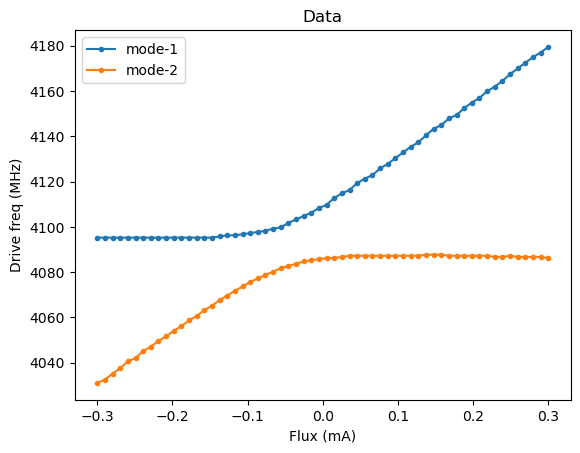

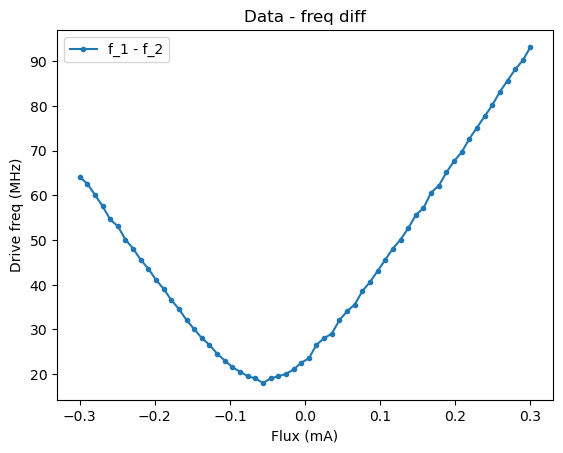

The smallest freq diff is 18.04 MHz
Estimated coupling = 9.02 MHz
minimum occurs at index 24


In [ ]:
index = 26
f_low = np.array(qubit0_freqs[0:index] + qubit1_freqs[index:])
f_high = np.array(qubit1_freqs[0:index] + qubit0_freqs[index:])

plt.plot(q1_flux,f_high, '.-', label = 'mode-1')
plt.plot(q1_flux,f_low, '.-', label = 'mode-2')
plt.legend()
plt.title('Data')
plt.ylabel('Drive freq (MHz)')
# plt.xlabel('Detuning (MHz)')
plt.xlabel('Flux (mA)')
plt.show()

plt.plot(q1_flux,f_high - f_low, '.-', label = 'f_1 - f_2')
plt.legend()
plt.title('Data - freq diff')
plt.ylabel('Drive freq (MHz)')
# plt.xlabel('Detuning (MHz)')
plt.xlabel('Flux (mA)')
# plt.axvline(q1_flux[-18])
plt.show()
min_delta = np.min(f_high - f_low)
print('The smallest freq diff is %.2f MHz' %min_delta)
print('Estimated coupling = %.2f MHz' %(min_delta/2))

delta = f_high - f_low

min_index = np.argmin(delta)

print('minimum occurs at index', min_index) 

In [334]:
print(t1_times[6])

[16.56058254 16.70055417 17.80399023 15.70014727 14.13952095 12.38052415
 11.75233511 12.831407   12.15267729 11.9002933  11.005947   11.91130884
 12.41565024 12.2966101  12.06620238 12.7941872  16.25749167 17.49455565
 16.38231109 16.63464115 19.85955919 21.74100163 24.8211104  20.20559943
 25.38729333 23.99720799 22.96564723 24.99919385 19.0894147  26.33283366
 25.01808474 25.21778778 28.79998759 31.05850873 31.89543867 29.67725149
 13.33768017 26.90775914 20.89239274 25.12884209 23.6027817  15.9674319
 25.75142183 24.19565089 18.01531364 18.13584885 19.83416262 18.54198835
 16.36895066 17.69170961 16.5635741  21.90136787 19.98610912 22.89639073
 18.84777873 22.5013977  20.13664129 23.45913458 23.67019167 25.33441914
 20.66063027 24.61357839 31.50947559 29.98834372 29.47199944 34.077768
 31.95129132 29.35724567 32.55912538 32.52157444 31.20778066 22.48148702
 28.87383313 22.94352199 18.88945599 25.15923914 21.68559545 23.4826602
 20.15033253 19.76457906  0.          0.          0.   